# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Downloading the packages that are not in the requirements.txt file
!pip install matplotlib --q
!pip install seaborn --q
!pip install scipy scikit-learn --q
!pip install imbalanced-learn --q
! pip install --upgrade xgboost --q
! pip uninstall -y xgboost --q
! pip install xgboost --q


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# Data Handling and Mathematical Operations
import numpy as np
import pandas as pd

#Data Visualisation and Exploratory Data Analysis
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Selection and Statistics Tests
import scipy
import sklearn
import scipy.stats as stats
from scipy.stats import pointbiserialr, ttest_ind
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#Data Preparation for Modelling
import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

#Applying important setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Add the dependencies to the requirements file
print("matplotlib=", mlt.__version__)
print("seaborn==", sns.__version__)
print('scipy==', scipy.__version__)
print('sklearn==', sklearn.__version__)
print("imbalanced-learn==", imblearn.__version__)

matplotlib= 3.10.5
seaborn== 0.13.2
scipy== 1.16.1
sklearn== 1.6.1
imbalanced-learn== 0.13.0


---
## A. Project Description


In [6]:
student_name = "Kshitij Surte Surte"
student_id = "25094069"
group_id = "6"

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [9]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [10]:
# <Student to fill this section>
business_use_case_description = """
The business goal of this project is to create a forecasting system that gauges the chances of a college basketball athlete being selected by the NBA, using their performance metrics and personal characteristics. This offers a tactical value to organisations by equipping NBA franchises, talent evaluators and analysts with an evidence-based resource to evaluate draft prospects. Through the analysis of historical data, the model seeks to improve a player's probability of being chosen with increased precision and objectivity
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [12]:
# <Student to fill this section>
business_objectives = """
Precise forecasts can greatly improve the effectiveness of selection procedures. For NBA organisations, this entails more accurate recognition of overlooked or high-ability prospects while staying clear of risky choices. Colleges and representatives can leverage these insights to refine training plans and marketing approaches, and basketball fans and analysts benefit from more reliable forecasts. More crucially, it fosters openness and impartiality within a process often characterised by subjectivity. Conversely, inaccurate estimations can lead to serious repercussions. Missed detections, overlooking talented individuals, may cause teams and athletes to miss valuable opportunities. On the other hand, incorrect positive predictions (False Positives) favouring unsuitable candidates can result in ineffective draft selections, monetary setbacks and damage the team's reputation.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [14]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of the forecasting model will be used by a range of stakeholders who are directly or indirectly involved in the NBA drafting process. NBA team managers and scouts will use these predictions for identifying and evaluating players in terms of their risk and reward. College coaches and Performance analysts can leverage the insights to understand what attributes contribute to draft success and can alter their training accordingly. Sports media and betting companies may use the probabilities for forecasting and odds-making, while players and their agents can improve their draft chances and tailor their career strategies accordingly. Ultimately, the predictions from this forecasting system influence not just the decision makers but also the players themselves, the teams' competitive and financial performance, and public narratives shaped by fans and media.
"""

In [15]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [16]:
data = pd.read_csv('../train.csv')

#Creating a copy of the data to make sure we always have the original data
df = data.copy()

In [17]:
df.columns

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'porpag', 'adjoe', 'pfr', 'year', 'type',
       'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag',
       'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb',
       'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted'],
      dtype='object')

### C.2 Define Target variable

In [18]:
# <Student to fill this section>
target_definition_explanations = """
The business problem involves assisting NBA franchises, talent evaluators, and analysts in making better informed and unbiased choices during the player selection process by pinpointing which college athletes have the highest probability of being chosen in the NBA draft. Furthermore, after examining the data documentation, it becomes clear that "drafted" is the sole variable explicitly indicating a player's selection status. All other varibales detail the attributes or seasonal performance metrics of athletes.
"""

In [19]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [20]:
# <Student to fill this section>

target_name = 'drafted'

### C.4. General Understanding of data

In [21]:
df.shape

(14774, 62)

In [22]:
# Checking for Duplicate values
print("Total Count of Duplocated values: ", df.duplicated().sum())
print("Total Percentage of Duplicated values: ", (df.duplicated().sum() / df.shape[0]) * 100)

Total Count of Duplocated values:  2462
Total Percentage of Duplicated values:  16.66441045079193


There are about 16% values in the dataset which are the exact duplicates representing college atheletes having the same performance scores and other characteristics. Also could be an data entry error. 

Dropping these duplicates is essential, because if we keep these duplicate values and continue with the analysis. It will potentially lead to slightly biased results.

In [23]:
df.drop_duplicates(inplace = True)
df.shape

(12312, 62)

In [24]:
col_datatypes = []
num_unique_values = []
missing_val_perc = []
sample_value = []


for col in df.columns:
    col_datatypes.append(df[col].dtype)
    num_unique_values.append(df[col].nunique())
    missing_val_perc.append((df[col].isnull().sum()/df.shape[0])*100)
    sample_value.append(df[col][3:6].tolist())

results = pd.DataFrame()
results['column'] = df.columns
results['Data Type'] = col_datatypes
results['Number of Unique Values'] = num_unique_values
results['Missing Value Percentage'] = missing_val_perc
results['Sample Values'] = sample_value

results = results.sort_values(by='Missing Value Percentage', ascending=False).reset_index(drop=True)

results

,column,Data Type,Number of Unique Values,Missing Value Percentage,Sample Values
0,Rec_Rank,float64,500,66.926576,"[65.8, nan, nan]"
1,dunks_ratio,float64,151,63.604613,"[nan, nan, nan]"
2,rim_ratio,float64,1287,21.702404,"[nan, nan, nan]"
3,mid_ratio,float64,968,21.645549,"[nan, nan, nan]"
4,rimmade_rimmiss,float64,212,13.970110,"[nan, nan, nan]"
5,midmade,float64,88,13.970110,"[nan, nan, nan]"
6,midmade_midmiss,float64,201,13.970110,"[nan, nan, nan]"
7,dunksmade,float64,72,13.970110,"[nan, nan, nan]"
8,dunksmiss_dunksmade,float64,73,13.970110,"[nan, nan, nan]"
9,rimmade,float64,146,13.970110,"[nan, nan, nan]"


There are 29 variables having null values with two variables Rec_Rank and dunks_ratio having a missing value rate more than 50% and 14 varibales gaving null values less than a percentage.

Analysing it further we obtain the following:
1. We understand that datatypes for columns 1 to 10 needs to be investigated further as the sample values that we see are nan values. 

2. Sample values for variable 'ht' state that it could be a datetime variale. Futher investigation (Refering to data dictionary) is required to confirm this.

3. Varibales 'type' and 'yr' have ony one uniques value so they can be dropped as it would not have ant impact on the analysis.

4. The target variable drafted is a categorical varibale but is wrongly classified as numerical variable

### C.5 Explore Target variable

In [25]:
df[target_name].unique()

array([0., 1.])

In [26]:
df[target_name] = df[target_name].astype('bool')

The target varibale as examined earlier has two unique values where 0 states that the player is not drafted and 1 stating that the player is drafted. Understanding the distribution of the variables is essential. Also from the general understanding section of the data we can conclude that the target varibale should be categorical (boolean for binary classification data) rather than float which is assigned by default. 

In [27]:
def plot_category_distribution(column_name, title=None):

    category_counts = df[column_name].value_counts()
    percentages = (category_counts / category_counts.sum() * 100).round(3)

    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(category_counts.index, category_counts.values, color='#EDA99C')

    for bar, pct in zip(bars, percentages):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{pct}%",
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    ax.set_ylabel("Count")
    ax.set_xlabel(column_name)
    ax.set_title(title if title else f"Distribution of {column_name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

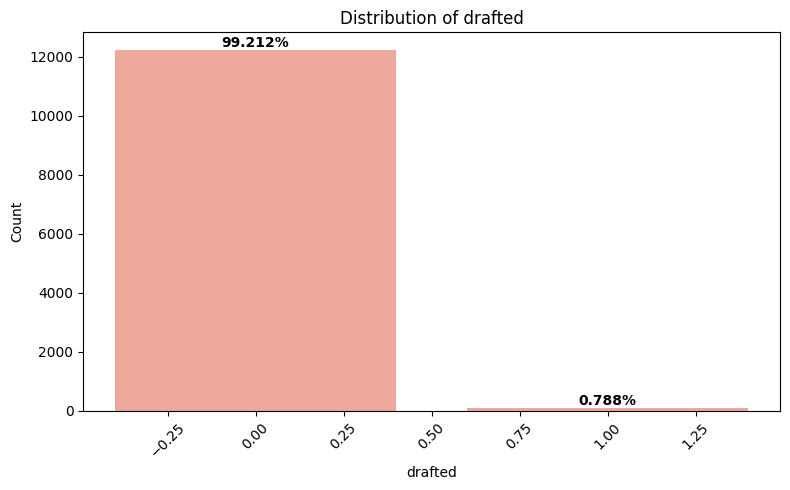

In [28]:
plot_category_distribution(target_name)

There is a major imbalance seen in the classes within the dataset with a very low number of drafted atheletes compared to the non-drafted players, possibly necessitating addressing during model training.

In [29]:
#Isolating the classing and undestanding the charateristics
df_drafted = df[df[target_name] == 1]
df_not_drafted = df[df[target_name] == 0]

In [30]:
df_drafted.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,97.000000,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,97.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,89.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,33.752577,65.931959,110.344330,23.696907,53.55567,56.695464,7.834021,16.358763,13.228866,17.226804,97.835052,140.329897,0.692402,127.639175,242.041237,0.525072,31.195876,85.371134,0.296660,4.204124,2.011340,43.847423,3.422655,120.765965,3.517526,2014.360825,96.858333,0.967400,84.322581,126.559140,42.333333,114.000000,0.658529,0.367069,26.903226,29.290323,0.910573,95.222400,90.310213,3.578098,190.840206,6.525552,3.309555,3.215995,6.504502,27.933278,3.946374,2.558128,1.736754,4.102428,5.839182,2.037961,0.987472,1.025935,13.164638
std,5.970467,18.373070,8.851071,4.235722,5.69649,5.041093,4.620198,6.039932,9.017991,3.892608,47.044013,63.423465,0.111042,51.078205,89.365112,0.068636,29.642537,75.448288,0.169181,3.961111,0.767148,14.722376,1.372291,10.750454,1.332527,2.803218,5.300559,0.590270,39.818927,53.680509,20.505743,49.978039,0.078105,0.072495,22.247650,23.517145,0.078430,6.540845,6.069455,0.784015,55.373860,3.450332,2.537813,2.603338,3.161888,6.111089,2.570689,1.738423,0.977647,1.561365,2.317024,1.700579,0.473949,0.964963,4.325694
min,3.000000,4.100000,92.500000,14.700000,38.30000,43.760000,1.100000,6.600000,0.900000,9.800000,7.000000,9.000000,0.295000,7.000000,20.000000,0.350000,0.000000,0.000000,0.000000,0.100000,0.700000,14.300000,0.385170,92.990100,1.400000,2009.000000,61.400000,0.058767,7.000000,13.000000,0.000000,7.000000,0.479500,0.000000,0.000000,0.000000,0.625000,77.277900,73.212700,1.252470,14.552300,-4.933990,-3.942210,-2.090520,-2.514890,7.481500,-3.529130,-1.627600,0.315800,1.552600,2.000000,0.037000,0.172400,0.029400,3.000000
25%,33.000000,57.300000,105.500000,20.900000,49.80000,53.510000,3.700000,11.100000,7.500000,14.700000,62.000000,97.000000,0.628000,97.000000,186.000000,0.481000,3.000000,15.000000,0.219000,1.200000,1.500000,33.800000,2.488760,112.689000,2.700000,2012.000000,96.750000,0.571402,59.000000,90.000000,26.000000,70.000000,0.602300,0.333300,11.000000,13.000000,0.850000,91.070100,86.647400,3.115980,158.070000,4.214080,1.856410,1.574610,4.240680,24.444400,2.606410,1.379760,0.916700,2.818200,4.026300,0.942900,0.650000,0.347800,10.333300
50%,35.000000,70.300000,109.700000,23.000000,52.70000,56.560000,7.700000,16.000000,10.800000,16.900000,98.000000,139.000000,0.706000,125.000000,248.000000,0.516000,26.000000,77.000000,0.348000,2.800000,1.900000,42.900000,3.347910,122.038000,3.200000,2015.000000,98.600000,0.866760,79.000000,122.000000,40.000000,117.000000,0.655900,0.369100,21.000000,24.000000,0.923100,96.178100,91.003500,3.775190,202.777000,6.834790,3.588960,2.738080,6.740220,29.500000,3.983830,2.269270,1.485700,3.918900,5.457100,1.515200,0.911800,0.785700,12.942900
75%,37.000000,80.100000,114.500000,26.000000,56.80000,59.100000,10.800000,20.200000,15.100000,19.600000,131.000000,178.000000,0.765000,160.000000,296.000000,0.568000,48.000000,126.000000,0.397000,5.900000,2.500000,52.300000,4.332290,127.016000,3.800000,2017.000000,99.450000,1.219512,103.000000,163.000000,56.000000,152.000000,0.714300,0.421100,37.000000,40.000000,0.977800,99.845900,94.595100,4.019150,231.982000,8.697740,4.92641

In [31]:
df_not_drafted.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,12215.000000,3976.000000,10931.000000,10499.000000,10499.000000,10499.000000,10499.000000,9547.000000,9554.000000,10499.000000,10499.000000,4392.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12214.000000,12211.000000,12211.000000,12214.000000,12214.000000,12214.000000,12214.000000,12214.000000,12214.000000,12214.000000
mean,21.180352,25.570372,85.603054,17.215898,41.428072,44.458756,5.669144,12.002022,9.778461,21.556406,19.483831,29.360295,0.522001,24.537372,52.908719,0.394195,9.480966,28.905526,0.204170,1.894867,1.676709,38.490053,0.252083,82.000808,4.630569,2013.480475,53.153672,0.824625,16.997428,29.599486,8.640347,25.599581,0.541478,0.302399,2.239070,2.538718,0.855887,103.816484,103.992587,0.983003,54.888353,-4.197553,-3.177899,-1.019655,-4.202017,12.150507,-3.426711,-0.775307,0.542989,1.245089,1.788079,0.707395,0.364444,0.198405,3.582842
std,10.491818,23.374477,34.185605,6.296126,20.711245,19.689417,16.357345,16.349229,9.929608,14.109887,25.214778,35.496393,0.289664,30.245990,61.262808,0.212790,15.080781,41.710321,0.198454,10.268480,2.650329,43.615725,0.896939,33.444914,7.846561,2.890461,27.734497,0.671346,21.196414,34.590918,11.734692,31.369759,0.216332,0.192699,5.482266,6.038101,0.252480,15.831527,16.230903,0.815430,51.825780,9.853963,5.817226,6.199323,9.139441,8.870082,6.653839,3.807316,0.570455,1.085074,1.569108,0.882378,0.370733,0.321740,3.501848
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.714300,-36.615900,0.000000,2009.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-88.479400,-68.542000,-57.459400,-176.493000,0.000000,-106.262000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,4.200000,75.400000,13.900000,34.600000,38.630000,1.500000,7.500000,3.200000,14.900000,2.000000,3.000000,0.400000,2.000000,6.000000,0.323000,0.000000,1.000000,0.000000,0.000000,0.600000,15.900000,-0.315097,70.809750,2.900000,2011.000000,29.800000,0.363636,2.000000,4.000000,1.000000,3.000000,0.454500,0.200000,0.000000,0.000000,0.800000,99.710800,98.669500,0.332487,8.514195,-7.146860,-5.311490,-2.769035,-7.107115,4.625000,-5.749155,-2.150155,0.136400,0.428600,0.625000,0.121200,0.083300,0.000000,1.000000
50%,25.000000,19.500000,91.100000,17.200000,44.700000,48.180000,4.100000,10.900000,7.900000,20.500000,10.000000,16.000000,0.600000,13.000000,30.000000,0.429000,2.000000,9.000000,0.229000,0.700000,1.400000,31.600000,0.062016,87.766000,4.100000,2013.000000,54.600000,0.714286,9.000000,17.000000,4.000000,14.000000,0.555600,0.314600,0.000000,0.000000,1.000000,104.555000,104.638000,0.774609,40.616400,-3.496840,-2.600270,-0.996135,-3.446850,10.200000,-2.916630,-0.622204,0.375000,1.000000,1.392900,0.393900,0.258100,0.083300,2.434800
75%,30.000000,42.300000,102.300000,20.600000,51.300000,53.960000,8.000000,15.000000,13.700000,26.900000,28.000000,43.000000,0.727000,36.000000,80.000000,0.506000,13.000000,42.000000,0.333000,2.400000,2.200000,50.000000,0.614143,100.118500,5.700000,2016.000000,77.400000,1.1

Based on basic statistics analysis, the following can be stated:

1. Minutes played (Min_per) – Drafted players average 158% more minutes (65.93 vs 25.57).

2. Offensive rating (Ortg) – 29% higher (110.34 vs 85.60).

3. Effective FG% (eFG) – 29% higher (53.56% vs 41.43%).

4. True Shooting% (TS_per) – 28% higher (56.70% vs 44.46%).

5. Points per game (pts) – 268% more (13.16 vs 3.58).

6. 2-point attempts (twoPA) – 357% more (242.04 vs 52.91).

7. 3-point attempts (TPA) – 195% more (85.37 vs 28.91).

8. Box Plus-Minus (bpm) – 255% higher (+6.53 vs -4.20).

9. Offensive BPM (obpm) – 204% higher (+3.31 vs -3.18).

10. Defensive BPM (dbpm) – 415% higher (+3.21 vs -1.02).

11. Height (height_inches) – 2.8% taller (78.99 inches vs 76.87 inches, ~2 inches).

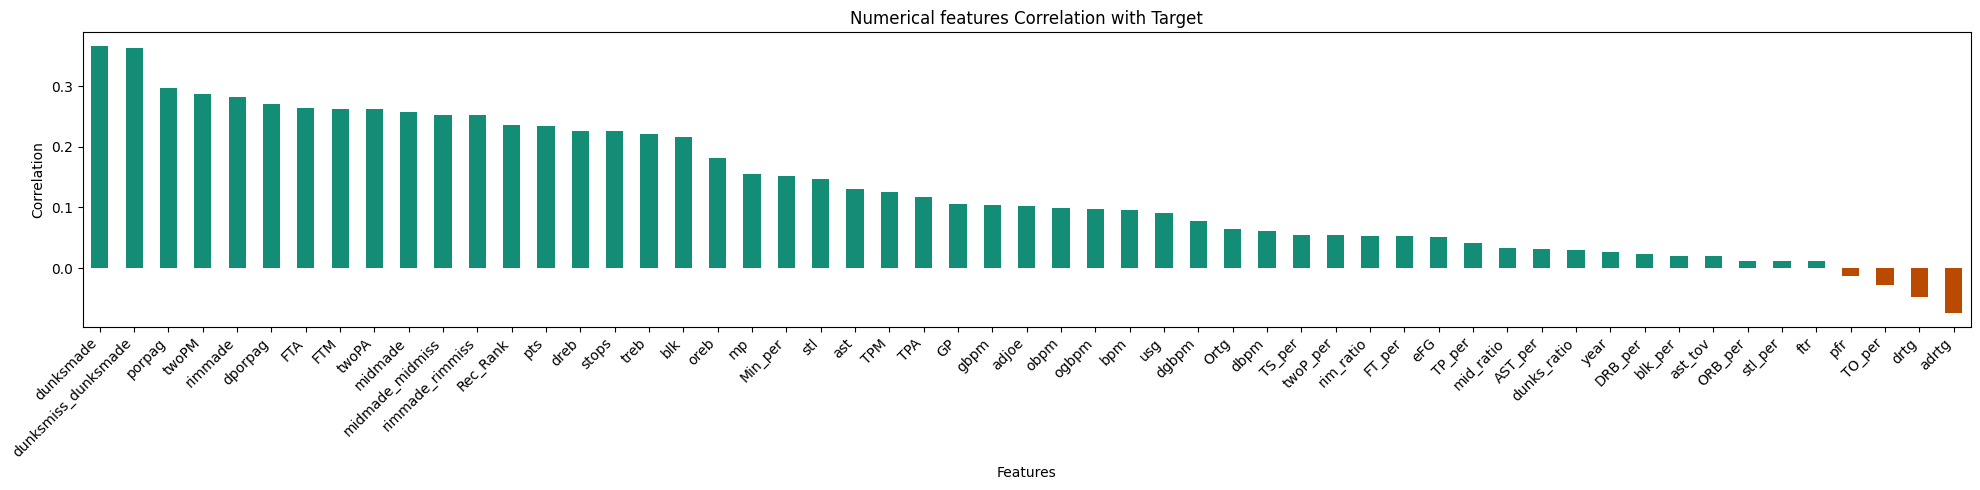

In [32]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

fig, ax = plt.subplots(figsize=(20, 5))
df_num = df[num_cols]
correlations = df_num.corrwith(df[target_name]).sort_values(ascending=False)
colors = ['#138d75' if val > 0 else '#ba4a00' for val in correlations]
correlations.plot(kind='bar', color=colors)
plt.title('Numerical features Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot shows that draft status is most positively correlated with dunks made, dunksmiss–dunksmade ratio, porpag, two-point makes, rim makes, and dporpag, indicating strong links between efficient scoring, finishing ability, and draft likelihood. Moderate positive correlations are seen for FTA, FTM, twoPA, and Rec_Rank, while physical stats like points, rebounds, and blocks have smaller effects. Height and shooting efficiency metrics show low positive correlations, and adrtg, drtg, and TO_per have weak negative associations with being drafted.

In [33]:
# <Student to fill this section>
target_distribution_explanations = """
The response variable within this dataset is binary, where a value of 0 signifies that the athlete was not drafted, and a value of 1 indicates that the athlete was chosen. Grasping its distribution is essential, as it uncovers a notable class disproportion, with a considerably smaller fraction of selected players compared to those not chosen. This skew may necessitate corrective techniques such as resampling or model adjustments during training to prevent bias toward the majority group. Statistical analyses contrasting the two cohorts reveal significant performance and physical distinctions. Selected athletes play approximately 158% more minutes on average, boast an offensive rating 29% higher, and exhibit improved shooting effectiveness with 29% greater effective field goal percentage and 28% higher true shooting percentage. They score 268% more points per game, make 357% more two-point attempts, and 195% more three-point attempts. Advanced analytical metrics further confirm this disparity, with chosen players displaying a 255% higher box plus-minus, 204% higher offensive BPM, and a remarkable 415% higher defensive BPM. In terms of physique, they are roughly 2.8% taller, which is about two inches in height. Further examination through correlation analysis reinforces these conclusions, indicating that draft position is most strongly linked to the number of dunks scored, the ratio of missed to successful dunks, propap, two-point shot conversions, rim shot successes, and dporpag. This suggests robust connections between effective scoring, finishing skills, and the probability of being drafted. Moderate positive relationships are also observed for free throw attempts (FTA), free throws made (FTM), two-point attempt count (twoPA), and Rec_Rank. Meanwhile, total points, rebounds, and blocks demonstrate smaller influence. Metrics related to height and shooting efficiency exhibit minimal positive correlations, whereas advanced defensive rating (adrtg), defensive rating (drtg), and turnover per game (TO_per) show weak negative associations with draft selection. While these differences offer strong indicators for prediction, potential challenges include the skewed nature of the target variable, possible fluctuations in player performance across seasons, and the risk that some key variables might be missing or inconsistently documented—all factors that could influence the robustness and applicability of the model.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.6.1 Explore Feature of Interest `ht`

Analysing the varibale 'ht' further - 

Information in Data Dictionary: ht - Height of student

In [35]:
df['ht'].unique()

array(['11-May', '2-Jun', '1-Jun', '-', '7-Jun', '10-Jun', '8-Jun',
       '8-May', '5-Jun', '4-Jun', '10-May', '3-Jun', '9-Jun', 'Jun-00',
       '6-Jun', '9-May', '11-Jun', 'Jul-00', '1-Jul', '7-May', '2-Jul',
       'Apr-00', '3-Jul', '6-May', '4-Jul', '5-May', '0', '1-May',
       '5-Jul', '6-Jul', '5-Apr', nan, '2-May'], dtype=object)

When we study the unique values in the variables, we understand that the data originally might be inches-feet which when inputing in the system, the feet might have changed to month. To eliminate two number showing the height in feet and inches, we can represent the height in inches only.

In [36]:
# Month to feet mapping
month_to_feet = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

def convert_to_inches(val):
    # Handle missing or placeholder values as we can see there exists one such value
    if pd.isna(val) or val in ['-', '0']:
        return np.nan
    
    try:
        day, month = val.split('-')
        feet = month_to_feet[month]
        inches = int(day)
        total_inches = feet * 12 + inches
        return total_inches
    except:
        return np.nan

df['height_inches'] = df['ht'].apply(convert_to_inches)

In [37]:
print(df['height_inches'].unique())
print("Orignal Data-Type for Height_inches: ",df['height_inches'].dtype)
df.drop(columns = ['ht'], inplace = True)

[71. 74. 73. nan 79. 82. 80. 68. 77. 76. 70. 75. 81. 78. 69. 83. 85. 67.
 86. 87. 66. 88. 65. 61. 89. 90. 53. 62.]
Orignal Data-Type for Height_inches:  float64


Based on the unique values that are present in the variable we can clearly state that the variable should have a 'int64' datatype

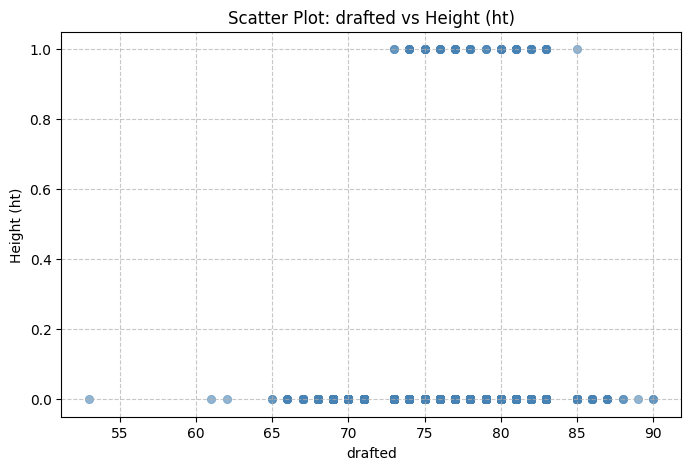

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='height_inches', y= target_name, alpha=0.6, color='steelblue', edgecolor=None)

plt.xlabel(target_name)
plt.ylabel('Height (ht)')
plt.title(f"Scatter Plot: {target_name} vs Height (ht)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

From the scatter plot, drafted players (1) generally have heights clustered in the mid-to-upper range (around 74–85 inches), whereas non-drafted players (0) show a wider spread, including shorter heights (<70 inches). 

In [39]:
# Defining functions for reuse of visualisation:
def box_univar(feature_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target_name, y=feature_name, palette='Set2')

    plt.xticks([0, 1], ['Not Drafted', 'Drafted'])
    plt.xlabel("Draft Status")
    plt.ylabel(feature_name.replace('_', ' ').title())
    plt.title(f"{feature_name.replace('_', ' ').title()} Distribution by {target_name.capitalize()}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def kde_univar(col):
  tot = sns.kdeplot(df[col][df['drafted'] == 1 ], color = 'Red', shade =True)
  tot = sns.kdeplot(df[col][df['drafted'] == 0 ], color = 'Blue', shade =True)
  tot.legend(['Drafted', 'Not Drafted'])
  tot.set_ylabel('Density')
  tot.set_xlabel(col)
  tot.set_title('{} by Drafted'.format(col))
  plt.show()

def fill_and_compare_box(feature_name, fill_strategy="mean"):

  col = df[feature_name]
  if fill_strategy == "mean":
      fill_value = col.mean()
  elif fill_strategy == "median":
      fill_value = col.median()
  elif isinstance(fill_strategy, (int, float, np.floating)):
      fill_value = fill_strategy
  else:
      raise ValueError("fill_strategy must be 'mean', 'median', or a numeric value.")

  df_filled = df.copy()
  df_filled[feature_name] = col.fillna(fill_value)

  df_drop = df.dropna(subset=[feature_name])

  fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
  sns.boxplot(data=df_filled, x=target_name, y=feature_name, palette='Set2', ax=axes[0])
  sns.boxplot(data=df_drop,   x=target_name, y=feature_name, palette='Set2', ax=axes[1])

  if sorted(pd.Series(df[target_name].dropna().unique()).tolist()) == [0, 1]:
      for ax in axes:
          ax.set_xticks([0, 1])
          ax.set_xticklabels(['Not Drafted', 'Drafted'])
  axes[0].set_title(f"{feature_name.replace('_',' ').title()} (Filled: {fill_strategy})")
  axes[1].set_title(f"{feature_name.replace('_',' ').title()} (Original, NaNs Dropped)")
  axes[0].set_xlabel("Draft Status")
  axes[1].set_xlabel("Draft Status")
  axes[0].set_ylabel(feature_name.replace('_', ' ').title())
  axes[1].set_ylabel("")  # sharey handles the scale

  for ax in axes:
     ax.grid(axis='y', linestyle='--', alpha=0.7)

  fig.suptitle(f"{feature_name.replace('_',' ').title()} Distribution by {target_name.capitalize()}", y=1.02)
  plt.tight_layout()
  plt.show()


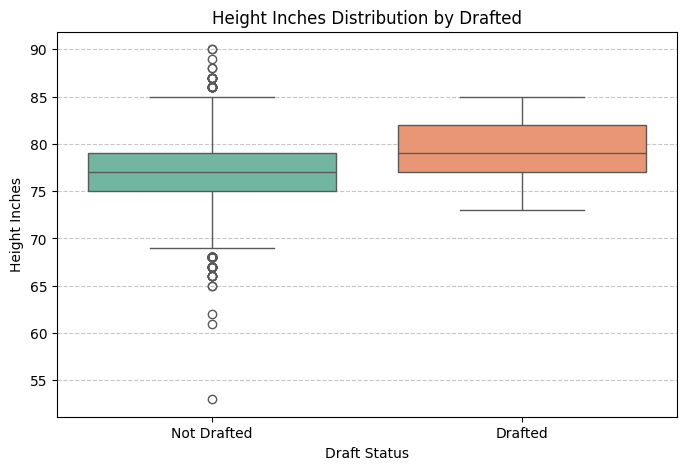

In [40]:
box_univar(feature_name='height_inches')

The box-plot is a better choice of visualisation as it give detailed information. It shows that drafted players tend to be taller on average than non-drafted players, with their median height around 80 inches compared to about 77 inches for non-drafted players. The drafted group also has a tighter height range, while the non-drafted group shows a wider spread and more extreme outliers on the shorter end (Confirmed in previous graph documentation). This indicates height is generally higher and more consistent among drafted players, suggesting it may be a positive factor in draft selection.

In [41]:
# <Student to fill this section>
feature_1_insights = """
The chosen attribute for examination is Height (inches). From the scatter diagram, it is clear that players who are chosen (1) generally possess heights grouped within the middle to higher spectrum (around 74–85 inches), whereas players not selected (0) display a broader distribution, including shorter heights below 70 inches. While the scatter diagram offers a preliminary overview, the box plot provides a more in-depth insight into the spread. It reveals that selected players tend to be taller on average, with a median height near 80 inches compared to approximately 77 inches for unchosen players. The group of chosen athletes also shows a narrower height variation, indicating more uniformity in stature, whereas the unchosen group demonstrates a larger range and more extreme lower-end outliers—a pattern aligned with earlier visual analysis. Although the height variable shows relatively low correlation with the target, it still demonstrates good potential in distinguishing between the classes, making it a useful attribute in combination with other predictors. These trends imply that height might be a favorable factor in the draft decision process. Nevertheless, there are limitations — height alone does not solely determine draft outcome, and considerable overlap between both groups suggests that other performance metrics and skill attributes are also vital. Furthermore, potential inconsistencies in measurement or incomplete data could introduce variability, affecting this feature’s predictive significance.
"""

In [42]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6.2 Explore Feature of Interest `REC_Rank`

Rec_Rank is the feature with the most missing values, also it has mediocre. But like Height variable, which demonstrated mediocre correlation with the target variable but showed a good potential for classification. Similar trend can be seen for this variable which makes it worth investigating.

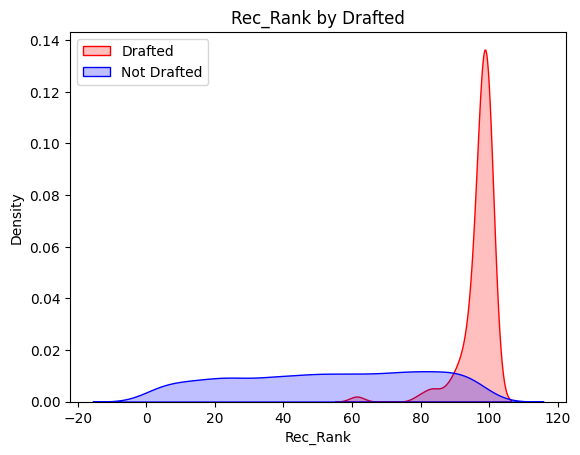

In [43]:
kde_univar('Rec_Rank')

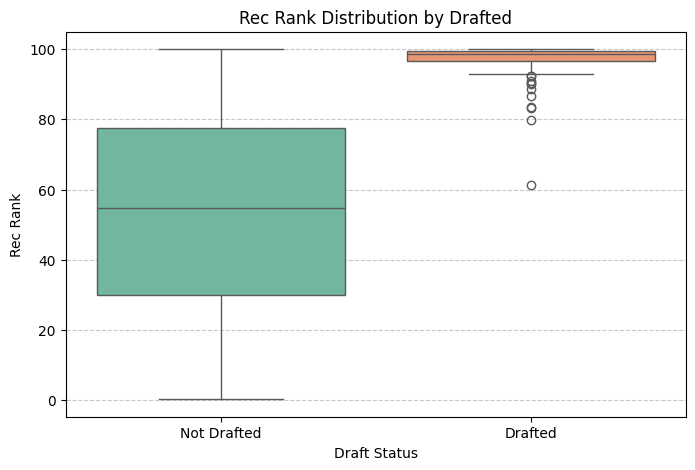

In [44]:
box_univar('Rec_Rank')

The plots show that drafted players have consistently high recruiting ranks, clustering tightly between ~95 and 100, whereas non-drafted players display a much wider spread from 0 to 100. This suggests recruiting rank is generally much higher and more consistent for drafted players, making it a strong differentiator between the two groups.

The variable Rec_Rank shows a good potential of having high classification power. Further examination of the variable after filling the missing value is required to access if it demonstrated the same potential.

Experimenting with different missing strategies

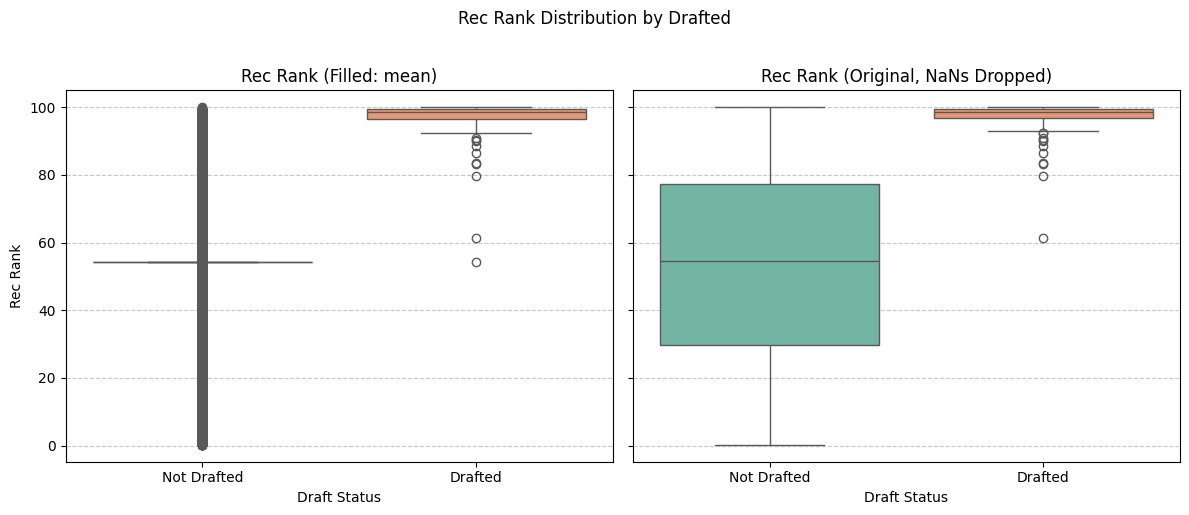

In [45]:
fill_and_compare_box('Rec_Rank', fill_strategy = "mean")

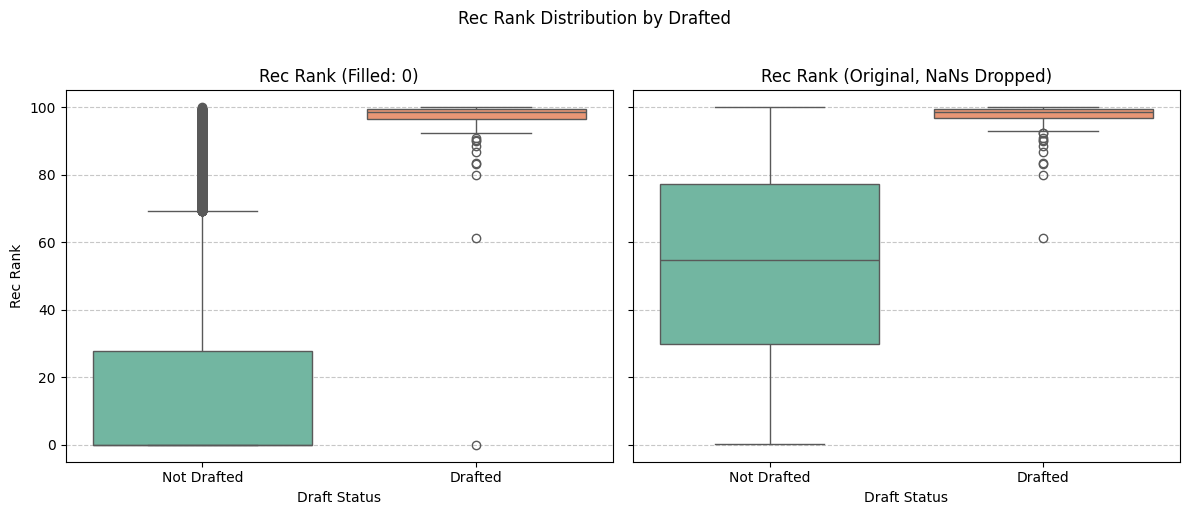

In [46]:
fill_and_compare_box('Rec_Rank', fill_strategy = 0)

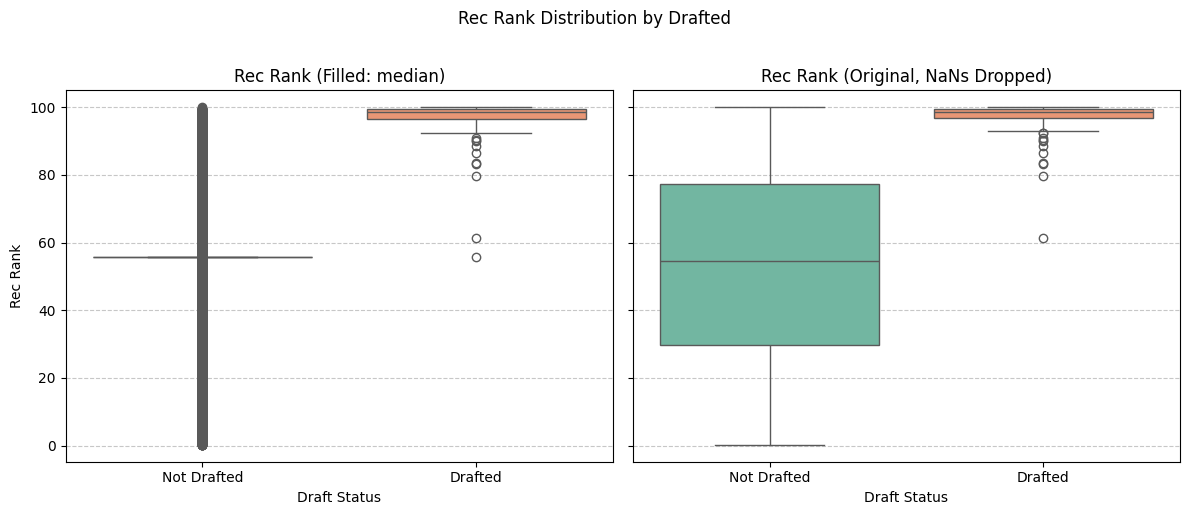

In [47]:
fill_and_compare_box('Rec_Rank', fill_strategy = "median")

Given the high missing rate of 63% in Rec_Rank, filling missing values with 0 is the most suitable strategy. A value of 0 logically represents “no recruitment rank,” which is realistic for many undrafted players, preserving the feature’s real-world meaning. In contrast, mean or median imputation distorts the distribution by clustering a large portion of missing cases at an artificial mid-point, reducing the separation between drafted and non-drafted players. Filling with 0 maintains this separation, avoids introducing misleading synthetic values, and retains the predictive signal present in the original data.

In [48]:
# <Student to fill this section>
feature_2_insights = """
The variable “Rec_Rank” clearly illustrates a distinct visual separation between players who were selected and those who were not. Players who were drafted tend to cluster prominently within the higher scoring range (90–100), whereas undrafted players exhibit a broader, more evenly spread distribution across the entire scale. This pattern is noticeable in both density and box plots, implying that “Rec_Rank” possesses significant discriminatory capacity when it comes to predicting draft outcomes. Nonetheless, its correlation with the target variable remains moderate (around 0.23), suggesting that while “Rec_Rank” provides useful information, it cannot serve as the sole indicator; it should be integrated with other features to enhance prediction accuracy. A major drawback of “Rec_Rank” is its substantial rate of missing data (66%), which complicates both exploratory analysis and model development. Various methods for handling these missing values influence the distribution differently. Using the mean or median for imputation introduces artificial peaks at the replacement value, especially skewing the non-drafted group and diminishing genuine variation. Assigning zeros maintains a broader spread in the data but risks imputing unrealistically low ranks to players with unrecorded data. Removing entries with absent values preserves the original distribution shape but results in significant data reduction, which could introduce bias into insights. For initial exploratory work, excluding incomplete records is preferable as it preserves authentic distribution patterns and prevents misleading trends. For predictive modeling purposes, median imputation might be a better approach, balancing data retention while reducing distortions caused by mean imputation. Regardless of the approach, “Rec_Rank” should be considered alongside other key metrics, as the overlap between groups indicates that it alone cannot fully account for draft choices.
"""

In [49]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

In [50]:
df['Rec_Rank'].fillna(value = 0, inplace = True)

### C.6.3 Explore Feature of Interest `Dunks_ratio`


Dunks_ratio is the feature with second most missing values, it has low correlation with the target variable but considering the results from the previous steps, it is still a good candidate for the further analysis

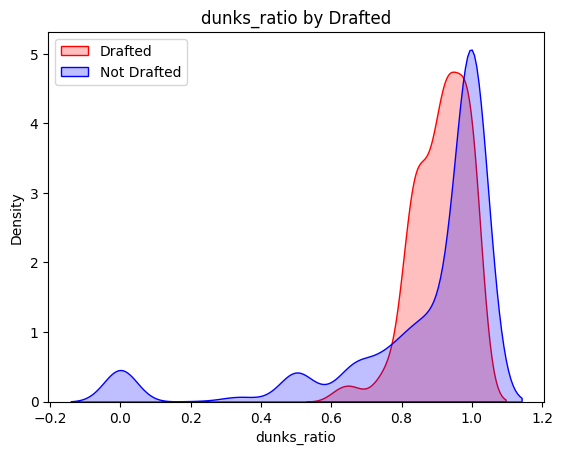

In [51]:
kde_univar('dunks_ratio')

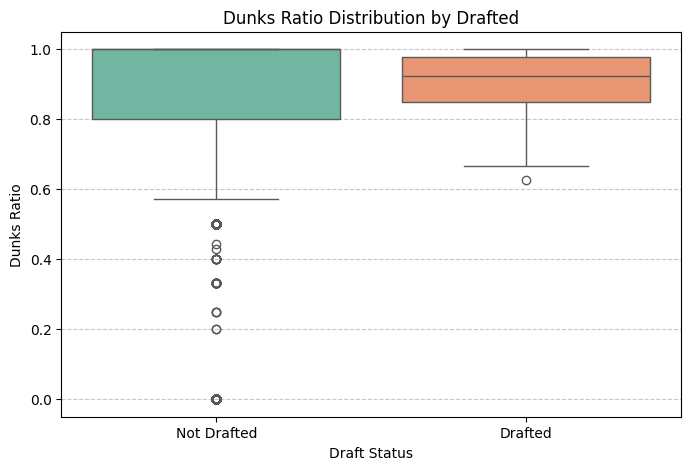

In [52]:
box_univar('dunks_ratio')

In [53]:
# <Student to fill this section>
feature_n_insights = """
The variable "dunks_ratio" displays a slight differentiation between players who were drafted and those who were not, with drafted players generally exhibiting marginally higher values. However, significant overlap appears in both the density distributions and box plots. Its relationship with the target outcome is minimal, and considering that approximately 63% of the data (around 7,560 entries out of 12,000) is missing, any attempts at filling in these gaps could potentially introduce bias or false patterns, especially if the missing data isn't randomly distributed. Although dunking ability might have some relevance within the domain context, the combination of its limited predictive power, high rate of absent data, and the risk of adding noise indicates it isn't a reliable standalone indicator. Given the dataset's size, the most straightforward approach would be to exclude "dunks_ratio" from the main modeling process, though testing its impact within a secondary pipeline using grouped median imputation could help verify its minimal contribution.
"""

In [54]:
# Do not modify this code
print_tile(size="h3", key='Dunks_Ratio_insights', value=feature_n_insights)

In [55]:
df.drop(columns = ['dunks_ratio'], inplace = True)

### C.6.4 Explore Feature of Interest `FTA`


This feature tells us about the attacking game of the candidate which will help us to know the contribution of a good attacker getting drafted.

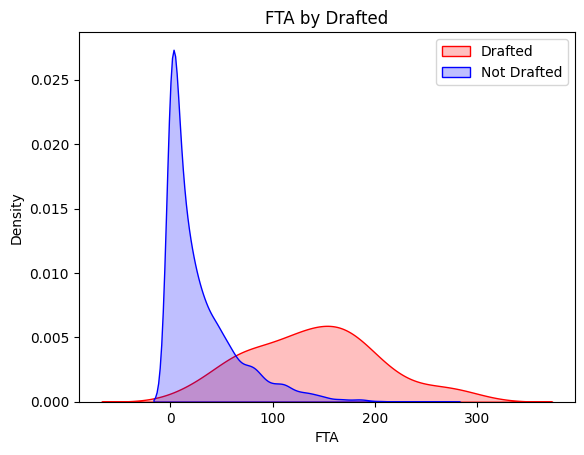

In [56]:
kde_univar('FTA')

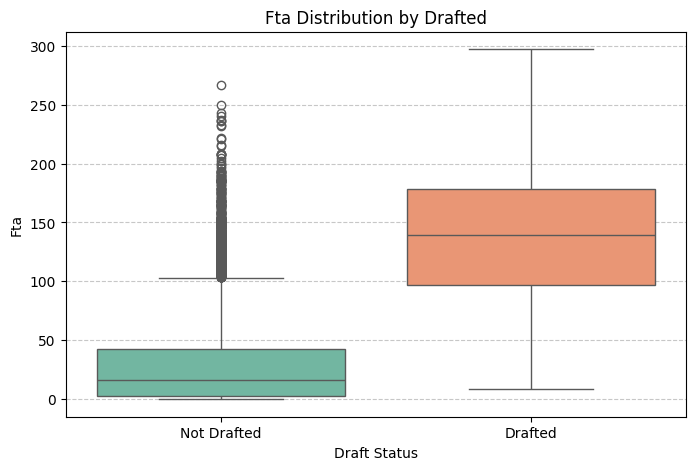

In [57]:
box_univar('FTA')

In [58]:
# <Student to fill this section>
feature_n_insights = """
The Free Throw Attempts (FTA) metric reveals a distinct and quantifiable contrast between athletes who are selected in drafts and those who are not. Analysis indicates that drafted players typically have a median FTA close to 140, with an interquartile range (IQR) approximately spanning from 100 to 180. In contrast, undrafted athletes tend to have a substantially lower median of about 20, with their IQR roughly ranging from 5 to 40. The density visualization demonstrates that the majority of undrafted individuals are tightly grouped near zero attempts, whereas drafted counterparts display a more dispersed distribution across higher FTA ranges, notably peaking between 100 and 200 tries. This pattern implies that players who are drafted tend to be more actively engaged in scoring opportunities and excel at provoking fouls—an attribute highly prized by talent evaluators. Although a small number of undrafted players achieve high FTA counts, these are exceptional cases rather than the general trend. The dataset contains no missing values and exhibits a moderate positive correlation (around 0.23) with the target outcome, indicating that FTA is a robust and meaningful feature worth preserving in the predictive model, without the necessity for data imputation or elaborate preprocessing steps.
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.6.5 Explore Feature of Interest `AST_per`

This variable explores the assiting ability of the player and how does the player senses the environment around it and react. And how this ability contributes to the chances of being drafted.

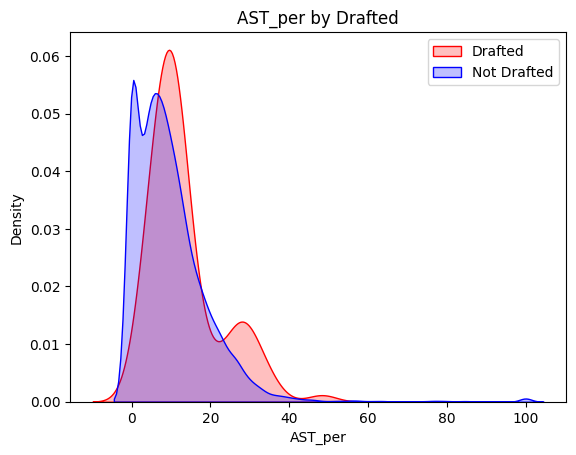

In [60]:
kde_univar('AST_per')

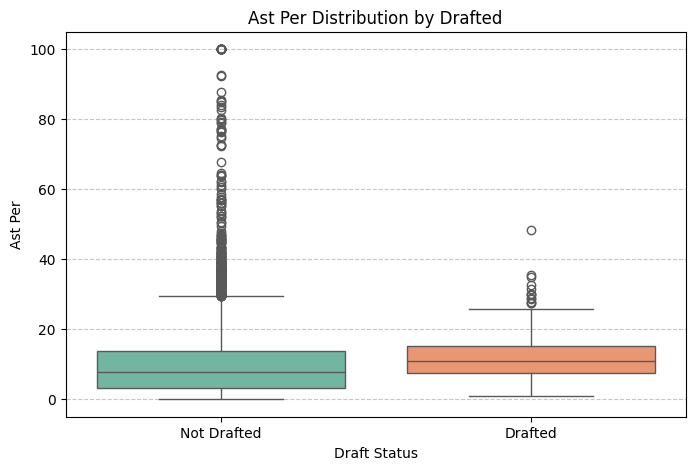

In [61]:
box_univar('AST_per')

In [62]:
# <Student to fill this section>
feature_n_insights = """
The variable “AST_per” represents a player’s assist ratio, reflecting their capacity to generate scoring chances for teammates and respond efficiently to the flow of the game. The distribution reveals a significant overlap between players who were drafted and those who went undrafted, though there is a slight shift—players selected through the draft generally exhibit marginally higher median assist percentages, approximately 12–13%, compared to around 10% for undrafted players. The interquartile range (IQR) is narrower for drafted athletes, indicating more consistent performance, whereas undrafted individuals display greater variation and a notable number of exceptional high outliers, some surpassing 80–100%. The density curve supports this observation, demonstrating a main cluster for both groups below 20%, but with drafted players showing a modestly higher peak. With complete data and a weak to moderate positive correlation (~0.06) with the outcome variable, AST_per alone may possess limited predictive ability. Nonetheless, its significance in assessing playmaking tendencies renders it a potentially useful ancillary metric when integrated with other performance indicators within predictive models.
"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.6.6 Explore Feature of Interest `blk_per`

This variable explores the blocking ability of a candidate and how does it contribute to get drafted.

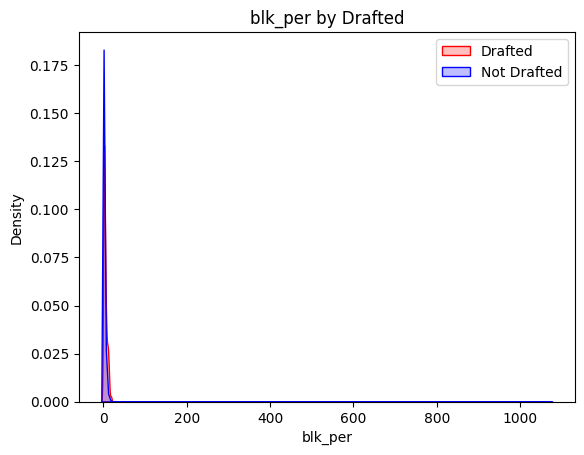

In [64]:
kde_univar('blk_per')

In [65]:
# <Student to fill this section>
feature_n_insights = """
The variable “blk_per” captures a player’s shot-blocking ability. Both drafted and undrafted players cluster near zero, with only a slight shift toward higher values for drafted players. No clear linear separation is visible, and substantial overlap limits its standalone predictive power. However, further analysis during feature selection—potentially including interaction terms with other defensive metrics—may uncover hidden value. We need to explore other defence abilities of the drafted players. 
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.6.6 Explore Feature of Interest `stl_per`

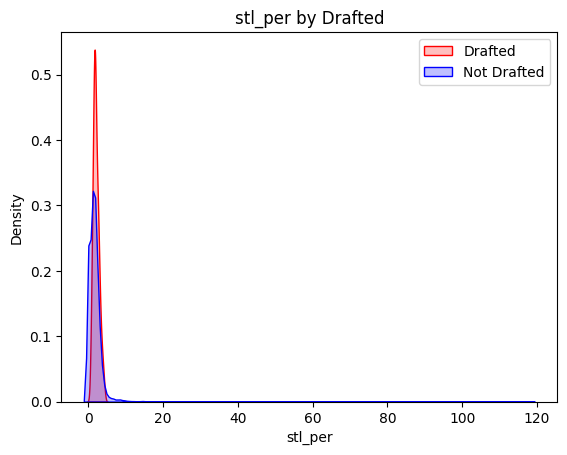

In [67]:
kde_univar('stl_per')

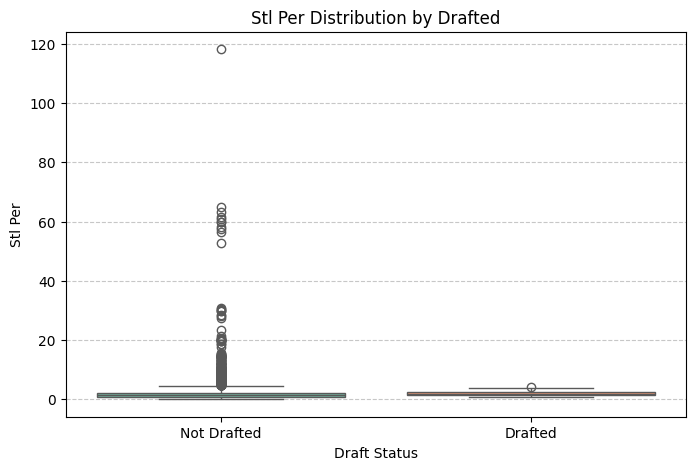

In [68]:
box_univar('stl_per')

In [69]:
# <Student to fill this section>
feature_n_insights = """
The variable “stl_per,” which indicates the rate of steals, exhibits only a slight distinction between players who were drafted and those who went undrafted. Both groups tend to gather densely around low percentages (approximately 0–3%), with notable overlap in their distribution ranges. Although drafted athletes display a marginally higher average, extreme outliers—especially among undrafted individuals—skew the overall variation. Similar to “blk_per,” the lack of a definitive linear boundary implies that defensive statistics like steals and blocks are not the key factors influencing draft choices. This suggests that NBA talent evaluators do not heavily weigh these particular defensive skills during player selection and are probably more focused on other performance indicators. While “stl_per” might still carry some indirect significance when analyzed alongside other metrics or interaction effects, independently it offers limited insight into predicting draft outcomes.
"""

In [70]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## D. Feature Selection


Dealing with missing values to make sure the data is ready for feature selection


In [71]:
cols_with_null_val = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        cols_with_null_val.append(col)

for col in cols_with_null_val:
    print(col)

ast_tov
rimmade
rimmade_rimmiss
midmade
midmade_midmiss
rim_ratio
mid_ratio
dunksmade
dunksmiss_dunksmade
drtg
adrtg
dporpag
stops
bpm
obpm
dbpm
gbpm
mp
ogbpm
dgbpm
oreb
dreb
treb
ast
stl
blk
pts
height_inches


Rationale for choosing the method for filling nan values:

The absent data points within this dataset are most effectively managed through a grouped median filling method, combined with conditional recalibration for derived ratios. This technique aligns well with the context of basketball analysis and helps maintain the authentic spread of performance indicators. 

Several key columns — such as shots made from rim, mid-range, dunks, player efficiency metrics like bpm, and stoppages—are fundamental game performance stats that significantly differ based on player roles, seasons, and competitive levels. Grouping by variables like year and conference ensures that the imputations reflect realistic patterns and prevent distortion caused by outliers. 

For ratio metrics such as rim_ratio, mid_ratio, and assist-to-turnover ratio, it’s best to recompute these values directly from their constituent statistics when available. This approach avoids introducing spurious biases. Only when the underlying base stats are missing should median values within groups be used. 

For height (height_inches), which has very few missing entries, imputing with the median prevents unrealistic player profiles. 

Similarly, variables with minor missingness (e.g., minutes played, offensive rebounds, points scored) can be safely filled with median values without significantly disturbing their overall distribution. Overall, this method ensures that the data filling process remains contextually relevant, statistically sound, and minimally disruptive—preserving both the predictive capacity and clarity for further analysis.

In [72]:
#Grouped Median Imputation for performance stats
performance_cols = [
    'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'dunksmade', 'dunksmiss_dunksmade', 'rim_ratio', 'mid_ratio',
    'ast_tov', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm',
    'dbpm', 'gbpm', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
    'ast', 'stl', 'blk', 'pts', 'mp'
]

for col in performance_cols:
    df[col] = df.groupby(['yr', 'conf'])[col].transform(
        lambda x: x.fillna(x.median())
    )


# Ratio Columns — Conditional Recalculation before filling
mask_rim = (
    df['rim_ratio'].isnull() &
    df['rimmade'].notnull() &
    df['rimmade_rimmiss'].notnull()
)
df.loc[mask_rim, 'rim_ratio'] = df.loc[mask_rim, 'rimmade'] / (
    df.loc[mask_rim, 'rimmade_rimmiss'] - df.loc[mask_rim, 'rimmade']
)

mask_mid = (
    df['mid_ratio'].isnull() &
    df['midmade'].notnull() &
    df['midmade_midmiss'].notnull()
)
df.loc[mask_mid, 'mid_ratio'] = df.loc[mask_mid, 'midmade'] / (
    df.loc[mask_mid, 'midmade_midmiss'] - df.loc[mask_mid, 'midmade']
)

df['ast_tov'] = df.groupby(['yr', 'conf'])['ast_tov'].transform(
    lambda x: x.fillna(x.median())
)

#Height — median by year to preserve realistic profiles
df['height_inches'] = df['height_inches'].fillna(value = df['height_inches'].median())

#Very Low Missingness Columns — direct median fill
low_missing_cols = ['mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']
for col in low_missing_cols:
    df[col] = df[col].fillna(df[col].median())


In [73]:
df.columns

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'porpag', 'adjoe', 'pfr', 'year', 'type',
       'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm',
       'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
       'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted', 'height_inches'],
      dtype='object')

In [74]:
cols_with_null_val = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        cols_with_null_val.append(col)

print(cols_with_null_val)

[]


### D.1 Approach "Statistical Test for Numerical features"


In [75]:
# Identify target and numeric feature columns                
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# IV / WoE parameters
n_bins = 10      
WOE_smooth = 0.5        

# Safety checks
df = df.copy()
df[target_name] = df[target_name].astype(int)

#### D.1.1 Point Biserial Correlation


Checking linear strength with target.

In [76]:
pb_rows = []
y = df[target_name].values

for col in num_cols:
    x = df[col].values
    r_pb, p_pb = pointbiserialr(y, x)
    pb_rows.append({"feature": col, "point_biserial_r": r_pb, "pb_pvalue": p_pb})

pb_results = pd.DataFrame(pb_rows).sort_values("point_biserial_r", ascending=False)
pb_results.head(20)


,feature,point_biserial_r,pb_pvalue
34,dunksmade,0.358774,0.000000e+00
35,dunksmiss_dunksmade,0.355764,0.000000e+00
22,porpag,0.296904,5.079066e-249
13,twoPM,0.286683,1.417524e-231
28,rimmade,0.275954,4.897732e-214
38,dporpag,0.270987,3.529518e-206
11,FTA,0.264332,6.559419e-196
10,FTM,0.262577,2.992651e-193
14,twoPA,0.262261,8.968774e-193
30,midmade,0.252414,2.995541e-178


Understanding from the results:

* Top features: dunksmade, dunksmiss_dunksmade, porpag, twoPM, rimmade — strongest positive linear links to being drafted (r ≈ 0.28–0.36).

* Moderate features: FTA, FTM, twoPA, midmade, midmade_midmiss, rimmade_rimmiss, pts, Rec_Rank, dreb, stops, treb, blk — relevant for linear models but weaker than top set (r ≈ 0.21–0.27).

* Weakest among significant ones: oreb, mp — low linear separation, may need MI or IV to justify retention.

* All p-values ≈ 0 due to large N → ranking by magnitude is the real filter here.

* Many high-PB features overlap with IV top list → strong candidates for inclusion in both linear and monotonic models.

* Variables with low PB but potential non-linear patterns will be checked in MI step before dropping.

#### D.1.2 T-test / F-test


Confirming significant mean difference between classes.

In [77]:
ft_rows = []
g0 = df[df[target_name] == 0]
g1 = df[df[target_name] == 1]

for col in num_cols:
    x0 = g0[col].values
    x1 = g1[col].values
    t_stat, t_p = ttest_ind(x0, x1, equal_var=False, nan_policy="omit")  
    F_stat = t_stat**2 if np.isfinite(t_stat) else np.nan
    ft_rows.append({"feature": col, "t_stat": t_stat, "t_pvalue": t_p, "F_stat": F_stat})

ftest_results = pd.DataFrame(ft_rows).sort_values("F_stat", ascending=False)
ftest_results.head(20)


,feature,t_stat,t_pvalue,F_stat
26,Rec_Rank,-67.487455,1.677154e-89,4554.556623
23,adjoe,-34.223273,6.521313e-61,1171.232426
38,dporpag,-32.461678,4.018185e-54,1053.760561
43,gbpm,-32.294876,1.112426e-57,1042.959002
40,bpm,-29.662839,5.755238e-54,879.884029
45,ogbpm,-27.524844,3.193723e-50,757.617049
2,Ortg,-26.031659,3.315603e-51,677.647287
44,mp,-25.226394,5.836769e-45,636.370937
41,obpm,-24.666783,2.677254e-45,608.450171
39,stops,-24.098061,8.167285e-43,580.716546


Understanding of the results:

1. Consistently strong across all three tests

    * Rec_Rank → Top in t/F-tests (F ≈ 4554), high PB (~0.23).

    * porpag → High PB (~0.30), strong t/F (F ≈ 516).

    * dporpag → High PB (~0.27), strong t/F (F ≈ 1053).

    * twoPM → High PB (~0.29), strong t/F (F ≈ 394).

    * pts → PB ≈ 0.23, t/F (F ≈ 473).

    * stops → PB ≈ 0.23, t/F (F ≈ 580).

2. High in PB, moderate in t/F: dunksmade, dunksmiss_dunksmade → Very high PB (~0.36) but not top-ranked in t/F → still valuable for models sensitive to correlation.

3. High in t/F, moderate in PB: adjoe, gbpm, bpm, ogbpm, Ortg, obpm, TS_per, adrtg → Exceptional t/F stats (F > 400) but PB in moderate range (0.18–0.26) → these may have strong mean shifts but not strictly linear correlations with target.

4. Moderate in all three tests: FTA, FTM, twoPA, dreb, treb → all PB ≈ 0.21–0.26, t/F (F ≈ 130–430) → useful, but not leading indicators.

5. Weakest relative to others: oreb (PB ≈ 0.18) and mp (PB ≈ 0.15) — pass t/F significance but comparatively small separation and correlation → need MI/IV check before deciding.

#### D.1.3. Information Value (IV)

Measure monotonic predictive power.

In [78]:
iv_rows = []
y = df[target_name].reset_index(drop=True)

for col in num_cols:
    s = df[col].reset_index(drop=True)

    mask = ~(s.isna() | y.isna())
    s_, y_ = s[mask], y[mask]

    if s_.nunique(dropna=True) <= 1:
        iv_rows.append({"feature": col, "iv": 0.0})
        continue

    try:
        q = min(n_bins, s_.nunique())
        bins = pd.qcut(s_, q=q, duplicates="drop")
    except ValueError:
        iv_rows.append({"feature": col, "iv": 0.0})
        continue

    tmp = pd.DataFrame({"bin": bins, "y": y_})
    grp = tmp.groupby("bin")["y"]

    good = (grp.size() - grp.sum()).astype(float)  
    bad  = grp.sum().astype(float)                 

    total_good = good.sum()
    total_bad  = bad.sum()

    if total_good == 0 or total_bad == 0:
        iv_rows.append({"feature": col, "iv": 0.0})
        continue


    k = WOE_smooth
    B = len(good)  
    p_good = (good + k) / (total_good + k * B)
    p_bad  = (bad  + k) / (total_bad  + k * B)

    woe = np.log(p_good / p_bad)
    iv = float(((p_good - p_bad) * woe).sum())

    iv_rows.append({"feature": col, "iv": iv})

iv_results = pd.DataFrame(iv_rows).sort_values("iv", ascending=False)
iv_results.head(20)


,feature,iv
26,Rec_Rank,5.147238
38,dporpag,3.901488
22,porpag,3.844878
13,twoPM,3.741313
43,gbpm,3.642685
40,bpm,3.616633
14,twoPA,3.501255
53,pts,3.397927
23,adjoe,3.352598
11,FTA,3.295098


1. Strong in All Three (Core Features):

These score high in PB (linear strength), have large t/F statistics (strong mean difference), and high IV (> 0.5 = strong predictive power, here many are >3 = extreme predictive power):

* Rec_Rank — PB ≈ 0.23, F ≈ 4554, IV ≈ 5.15 → clear top feature, stable across metrics.

* porpag — PB ≈ 0.30, F ≈ 516, IV ≈ 3.84 → highly predictive.

* dporpag — PB ≈ 0.27, F ≈ 1054, IV ≈ 3.90 → very strong.

* twoPM — PB ≈ 0.29, F ≈ 394, IV ≈ 3.74 → strong across board.

* pts — PB ≈ 0.23, F ≈ 473, IV ≈ 3.40 → core scoring metric.

* stops — PB ≈ 0.23, F ≈ 581, IV ≈ 3.18 → defensive impact.


.


2. High in PB + IV, Moderate in T/F:

Good linear correlation & monotonic predictive power, but not top in mean-separation:

* dunksmade — PB ≈ 0.36, IV ≈ 2.88, moderate F.

* dunksmiss_dunksmade — PB ≈ 0.36, IV ≈ ~2.8, moderate F.

* rimmade — PB ≈ 0.28, IV ≈ 3.21.

* FTA — PB ≈ 0.26, IV ≈ 3.30.

* FTM — PB ≈ 0.26, IV ≈ 3.13.

.



3. High in T/F + IV, Moderate in PB
Strong mean difference & monotonic power, but not strongly linear — may capture non-linear patterns:

* adjoe — F ≈ 1171, IV ≈ 3.35, PB ≈ 0.20.

* gbpm — F ≈ 1043, IV ≈ 3.64, PB ≈ 0.21.

* bpm — F ≈ 880, IV ≈ 3.62, PB ≈ 0.21.

* ogbpm — F ≈ 758, IV ≈ 3.06, PB ≈ 0.20.

* Ortg — F ≈ 678, IV ≈ ~2.9, PB ≈ 0.18.

.


4. Moderate Across All Three
Still useful but secondary to the above sets:

* twoPA — PB ≈ 0.26, F ≈ 433, IV ≈ 3.50.

* dreb — PB ≈ 0.23, F ≈ 130–140 range, IV ≈ 3.24.

* treb — PB ≈ 0.22, moderate F, IV ≈ 3.16.

* blk — PB ≈ 0.21, moderate F, IV ≈ ~2.8.

.


5. Weak in PB but Pass IV/T/F Significance
Possible non-linear importance or redundancy — keep for MI check:

* oreb — PB ≈ 0.18, moderate IV.

* mp — PB ≈ 0.16, strong F (~636), moderate IV.

Sumamary:

* Core keepers: Rec_Rank, porpag, dporpag, twoPM, pts, stops.

* Likely keepers for depth / interaction effects: dunksmade, dunksmiss_dunksmade, FTA, FTM, rimmade, adjoe, gbpm, bpm.

* Borderline keep / MI check: oreb, mp.

* High IV (>3) across many variables means strong monotonic separation potential — but beware multicollinearity in modelling phase.*

#### D.1.4.Mutual Information (MI)

Detect non-linear dependence.

In [79]:
X = df[num_cols].values
y = df[target_name].values

mi_scores = mutual_info_classif(
    X, y,
    discrete_features=False,
    random_state=42
)

mi_results = (
    pd.DataFrame({"feature": num_cols, "mi": mi_scores})
      .sort_values("mi", ascending=False)
      .reset_index(drop=True)
)
mi_results.head(20)


,feature,mi
0,Rec_Rank,0.030147
1,dporpag,0.023710
2,stops,0.020918
3,porpag,0.020794
4,twoPM,0.018323
5,bpm,0.018251
6,FTA,0.018225
7,twoPA,0.018115
8,dreb,0.016622
9,pts,0.016104


Result Interpretation:

1. Strong Across ALL FOUR (Linear + Mean Separation + Monotonic + Non-linear)
These features rank highly in PB, T/F, IV, and MI — they are your core keepers for Experiment 0.

* Rec_Rank — PB ≈ 0.23, F ≈ 4554, IV ≈ 5.15, MI ≈ 0.030 → Top across all, very stable.

* dporpag — PB ≈ 0.27, F ≈ 1054, IV ≈ 3.90, MI ≈ 0.024 → Defensive strength metric.

* porpag — PB ≈ 0.30, F ≈ 516, IV ≈ 3.84, MI ≈ 0.021 → Offensive impact metric.

* twoPM — PB ≈ 0.29, F ≈ 394, IV ≈ 3.74, MI ≈ 0.018 → Scoring efficiency.

* pts — PB ≈ 0.23, F ≈ 473, IV ≈ 3.40, MI ≈ 0.016 → Overall scoring volume.

* stops — PB ≈ 0.23, F ≈ 581, IV ≈ 3.18, MI ≈ 0.021 → Defensive plays measure.

.

2. High in PB + IV + MI, Moderate in T/F
Strong linear + monotonic + non-linear power, but mean difference is less extreme than above group.

* dunksmade — PB ≈ 0.36, IV ≈ 2.88, MI ≈ 0.016.

* dunksmiss_dunksmade — PB ≈ 0.36, IV ≈ ~2.8, MI ≈ 0.015.

* rimmade — PB ≈ 0.28, IV ≈ 3.21, MI ≈ 0.016.

* FTA — PB ≈ 0.26, IV ≈ 3.30, MI ≈ 0.018.

* FTM — PB ≈ 0.26, IV ≈ 3.13, MI ≈ 0.015.

.

3. High in T/F + IV + MI, Moderate in PB
These may be less linear but capture strong separation and non-linear dependencies — worth keeping.

* adjoe — PB ≈ 0.20, F ≈ 1171, IV ≈ 3.35, MI ≈ 0.015.

* gbpm — PB ≈ 0.21, F ≈ 1043, IV ≈ 3.64, MI ≈ 0.016.

* bpm — PB ≈ 0.21, F ≈ 880, IV ≈ 3.62, MI ≈ 0.018.

* ogbpm — PB ≈ 0.20, F ≈ 758, IV ≈ 3.06, MI ≈ 0.015.

* Ortg — PB ≈ 0.18, F ≈ 678, IV ≈ ~2.9, MI ≈ 0.015.

.
 
4. Moderate Across All, Still Useful for Model Depth
Not extreme in any single metric, but balanced across several — possible interaction or redundancy.

* twoPA — PB ≈ 0.26, F ≈ 433, IV ≈ 3.50, MI ≈ 0.018.

* dreb — PB ≈ 0.23, moderate F, IV ≈ 3.24, MI ≈ 0.017.

* treb — PB ≈ 0.22, moderate F, IV ≈ 3.16, MI ≈ 0.015.

* blk — PB ≈ 0.21, moderate F, IV ≈ ~2.8, MI ≈ 0.014.

.



5. Weak in PB but Pass IV/T/F and Have MI Signal
Likely non-linear importance — could be interaction features.

* oreb — PB ≈ 0.18, moderate IV, MI ≈ 0.013.

* mp — PB ≈ 0.16, strong F (~636), IV moderate, MI ≈ 0.013.* 

In [80]:
# <Student to fill this section>
feature_selection_1_insights = """
For feature selection of numerical variables, I used a statistical testing approach—executing statistical tests separately and interpreting results in their own context—so that I could capture different types of predictor–target relationships rather than relying on a single criterion. Specifically, I used: Point biserial correlation to measure direct linear association between numeric predictors and the binary target; Welch t-test and the fact that F = t² to quantify mean separation between classes; Information Value (IV) with Weight of Evidence (WoE) to assess ordered, directional relationships; and Mutual Information (MI) to identify variables with potential predictive value missed by purely linear tests. This method ensured I could identify features that perform strongly under different statistical perspectives. The results showed a core group—Rec_Rank, dporpag, porpag, twoPM, pts, and stops—that scored highly across all metrics, making them robust baseline features. Other variables ranked highly in IV or MI but moderately in PB/t-test, suggesting non-linear or monotonic strengths suited to tree-based or interaction-sensitive models. This stepwise, multi-perspective screening maximised retention of diverse predictive patterns while reducing the risk of prematurely discarding valuable features.
"""

In [81]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Statistical test for categorical features"


In [82]:
df_cat_analysis = df.copy()

categorical_features = df_cat_analysis.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = [col for col in categorical_features if col != target_name]

### D.2.1 Cramers V test

Measure association strength (0–1).

In [83]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_results = []

for col in categorical_features:
    val = cramers_v(df_cat_analysis[col], df_cat_analysis[target_name])
    cramers_results.append((col, val))

cramers_df = pd.DataFrame(cramers_results, columns=['feature', 'cramers_v'])
cramers_df.sort_values('cramers_v', ascending=False, inplace=True)
print("\n=== Cramér’s V Results ===")
print(cramers_df)


=== Cramér’s V Results ===
     feature  cramers_v
0       team   0.361814
1       conf   0.161983
4  player_id   0.112933
2         yr        NaN
3       type        NaN


Results Understandings:

* team stands out as the most promising categorical predictor.

* conf might add marginal predictive power.

* player_id’s low value suggests limited utility unless it encodes some indirect grouping (but ID-like variables usually aren’t predictive).

* yr and type are likely useless in their current form due to zero variability.

### D.2.2. Information Value (IV)

Predictive separation for categorical features

In [84]:
def calculate_iv_cat(df, feature, target):
    lst = []
    for val in df[feature].unique():
        all_count = df[df[feature] == val].count()[feature]
        good = df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        bad = df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        dist_good = good / (df[target] == 0).sum()
        dist_bad = bad / (df[target] == 1).sum()
        woe = np.log((dist_good + 0.0001) / (dist_bad + 0.0001))
        iv = (dist_good - dist_bad) * woe
        lst.append(iv)
    return sum(lst)

iv_results_cat = []

for col in categorical_features:
    iv_val = calculate_iv_cat(df_cat_analysis, col, target_name)
    iv_results_cat.append((col, iv_val))

iv_df_cat = pd.DataFrame(iv_results_cat, columns=['feature', 'iv'])
iv_df_cat.sort_values('iv', ascending=False, inplace=True)
print("\n=== Information Value (IV) Results ===")
print(iv_df_cat)


=== Information Value (IV) Results ===
     feature        iv
0       team  5.605552
4  player_id  5.252940
1       conf  4.792152
2         yr  0.000000
3       type  0.000000


Result Interpretation:

* team shows moderate association (Cramér’s V = 0.362) and extremely strong predictive separation (IV = 5.606). This suggests the feature is highly relevant, but such a high IV may indicate possible data leakage or that the feature is directly tied to the target.

* conf has weak association (Cramér’s V = 0.162) but very strong predictive power (IV = 4.792), implying that while the direct relationship is weak, certain categories within it split the target classes sharply.

* player_id has very weak association (Cramér’s V = 0.113) but extremely high predictive power (IV = 5.253). This is a strong data leakage risk, as identifiers generally should not have predictive influence in a fair model.

* yr and type have no measurable association (NaN in Cramér’s V) and zero predictive power (IV = 0.0), making them irrelevant for the model.

* High IV (>2) for any variable should be investigated for overfitting or leakage before inclusion.

* Combining Cramér’s V and IV helped identify features with both high association and predictive separation, as well as features with misleadingly high predictive power despite low association (potential leakage).

In [85]:
# <Student to fill this section>
feature_selection_2_insights = """
For categorical feature selection, I used a featuring approach—executing multiple tests separately and interpreting them in their own context—to capture different aspects of predictor–target relationships. Specifically, I used Cramér’s V to measure the strength of association (0–1 scale) between categorical features and the binary target, which is useful for detecting general dependence patterns regardless of predictive direction. I also applied Information Value (IV) with Weight of Evidence (WoE) to quantify predictive separation, which ranks categorical variables by their ability to split the target classes effectively. This dual perspective allowed me to identify features with both strong overall association and high predictive power, while also flagging potential data leakage cases where IV is extremely high but association is low. The results showed that team, conf, and player_id had very high IV values (>4), indicating strong separation of target classes, but player_id in particular presented a leakage risk due to its nature as an identifier. yr and type had negligible association and zero IV, marking them as irrelevant for modeling. This method ensured that I retained features with meaningful predictive contribution while avoiding variables that could bias or overfit the model
"""

In [86]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.3 Approach "Correlation Heatmap"


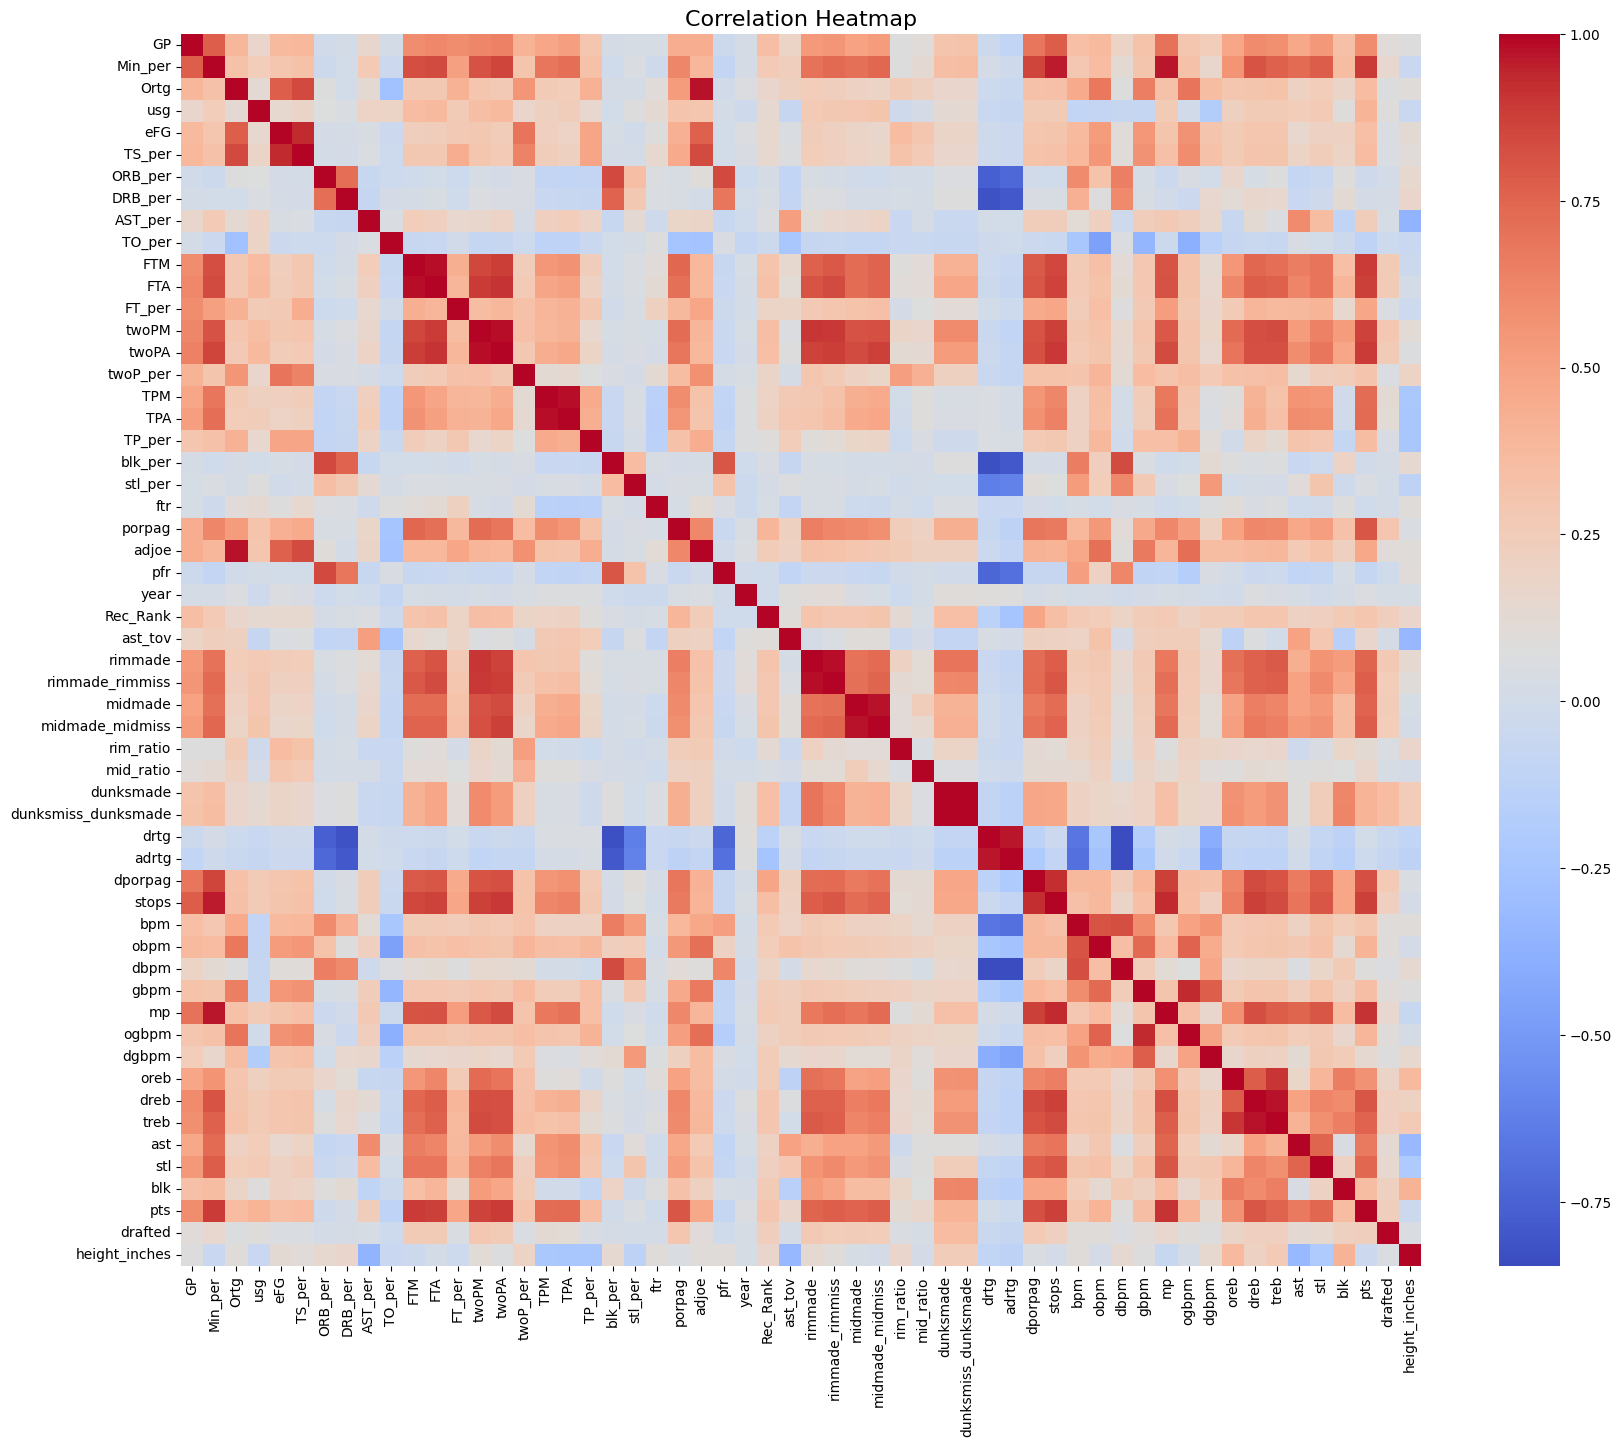

In [87]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot= False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [88]:
feature_selection_n_insights = """
Based on the correlation assessment, several attributes within the dataset display exceptionally strong pairwise relationships, signaling possible multicollinearity issues. To prevent redundancy and enhance clarity in interpretation, it is recommended to eliminate the less straightforward or more derived indicators while preserving the variables that are more comprehensible to stakeholders. For instance, FTA shows a high correlation with FTM, so retaining FTA as the attempt indicator is more intuitive, allowing FTM to be excluded. Similarly, twoPM and twoPA are tightly linked, and since twoPA (attempts) is more meaningful, twoPM can be discarded. When considering shooting zones, the ratio-based features rimmade_rimmiss, midmade_midmiss, and dunksmiss_dunksmade strongly associate with their respective made-shot totals (rimmade, midmade, and dunksmade), making it advisable to keep the absolute made-shot counts and remove the ratio variables. Furthermore, treb is highly correlated with both dreb and oreb, and because it is a composite total, removing treb is justified. High-level efficiency measures such as bpm, obpm, dbpm, gbpm, ogbpm, and dgbpm are also strongly interconnected; in such situations, selecting the most relevant metrics—like bpm—and removing the others can streamline the model. Overall, the recommended variables to eliminate include: FTM, twoPM, rimmade_rimmiss, midmade_midmiss, dunksmiss_dunksmade, treb, obpm, dbpm, gbpm, ogbpm, and dgbpm. Removing these will diminish multicollinearity while maintaining a dataset that is interpretable, stable, and suitable for feature selection and predictive modeling.
 """

In [89]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_n_insights', value=feature_selection_n_insights)

### D.3 Approach "Model-based  Feature Importance"

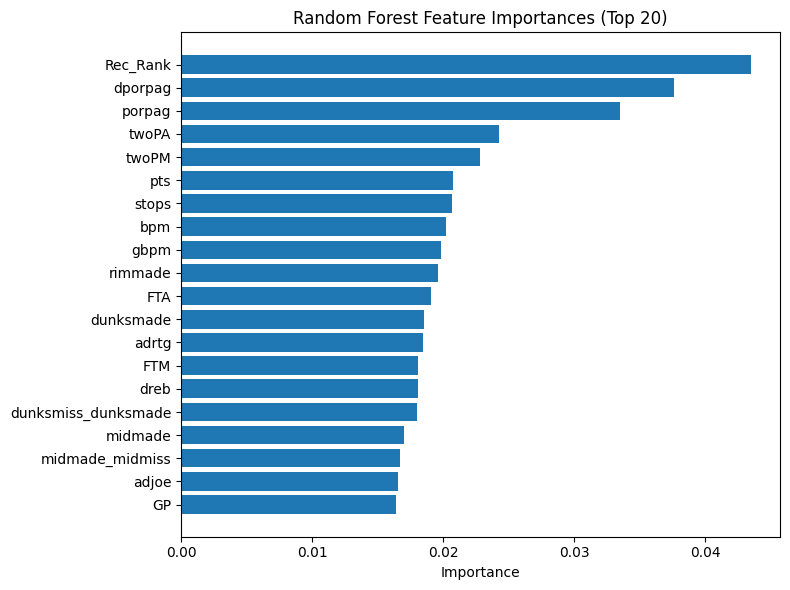

In [90]:
df1 = df.copy()
X = df1.drop(columns=[target_name])
y = df1[target_name].map({sorted(df1[target_name].unique())[0]: 0, sorted(df1[target_name].unique())[1]: 1})

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer([
    ("num", Pipeline([("imputer", SimpleImputer(strategy="median"))]), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

rf = Pipeline([
    ("prep", preprocess),
    ("mdl", RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42))
])
rf.fit(X, y)

feat_names = rf.named_steps["prep"].get_feature_names_out()
feat_names = [n.split("__", 1)[-1] for n in feat_names]
imps = rf.named_steps["mdl"].feature_importances_

order = np.argsort(imps)[-20:]
plt.figure(figsize=(8, 6))
plt.barh(np.array(feat_names)[order], imps[order])
plt.title("Random Forest Feature Importances (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [91]:
feature_selection_n_insights = """
After applying statistical tests and identifying redundancy using a correlation heatmap, I used Random Forest feature importance as the next step to validate and rank predictors within a predictive context. Unlike purely statistical measures, Random Forest captures non-linear relationships and feature interactions, offering an embedded, model-based measure of each variable’s contribution to classification accuracy. The results show Rec_Rank, dporpag, and porpag as the most influential, indicating that both player ranking and efficiency metrics play a decisive role in draft prediction. 
"""

In [92]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_n_insights', value=feature_selection_n_insights)

## D.z Final Selection of Features

In [93]:
# <Student to fill this section>

features_list = ['Rec_Rank', 'porpag', 'dporpag', 'twoPM', 'pts',  'stops', 'FTA', 'rimmade', 'dunksmade', 'adjoe', 'gbpm', 'bpm']
final = ['Rec_Rank', 'porpag', 'dporpag', 'twoPM', 'pts',  'stops', 'FTA', 'rimmade', 'dunksmade', 'adjoe', 'gbpm', 'bpm', 'drafted']

In [94]:
df1 = df[final]

In [95]:
# <Student to fill this section>
feature_selection_explanations = """
The final features were selected using statistical tests (Point-Biserial, T/F, IV, MI), categorical analysis (Cramér’s V, IV), a correlation heatmap to remove multicollinearity, and Random Forest importance for predictive validation. Core features — Rec_Rank, porpag, dporpag, twoPM, pts, stops — showed strong, consistent predictive power, while FTA, rimmade, dunksmade, adjoe, gbpm, and bpm were kept for their value in capturing non-linear effects and interactions, ensuring a balanced and robust set.
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Fixing: Missing values

In [97]:
# Already implemented

'''
#Grouped Median Imputation for performance stats
performance_cols = [
    'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'dunksmade', 'dunksmiss_dunksmade', 'rim_ratio', 'mid_ratio',
    'ast_tov', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm',
    'dbpm', 'gbpm', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',
    'ast', 'stl', 'blk', 'pts', 'mp'
]

for col in performance_cols:
    df[col] = df.groupby(['yr', 'conf'])[col].transform(
        lambda x: x.fillna(x.median())
    )


# Ratio Columns — Conditional Recalculation before filling
mask_rim = (
    df['rim_ratio'].isnull() &
    df['rimmade'].notnull() &
    df['rimmade_rimmiss'].notnull()
)
df.loc[mask_rim, 'rim_ratio'] = df.loc[mask_rim, 'rimmade'] / (
    df.loc[mask_rim, 'rimmade_rimmiss'] - df.loc[mask_rim, 'rimmade']
)

mask_mid = (
    df['mid_ratio'].isnull() &
    df['midmade'].notnull() &
    df['midmade_midmiss'].notnull()
)
df.loc[mask_mid, 'mid_ratio'] = df.loc[mask_mid, 'midmade'] / (
    df.loc[mask_mid, 'midmade_midmiss'] - df.loc[mask_mid, 'midmade']
)

df['ast_tov'] = df.groupby(['yr', 'conf'])['ast_tov'].transform(
    lambda x: x.fillna(x.median())
)

#Height — median by year to preserve realistic profiles
df['height_inches'] = df['height_inches'].fillna(value = df['height_inches'].median())

#Very Low Missingness Columns — direct median fill
low_missing_cols = ['mp', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']
for col in low_missing_cols:
    df[col] = df[col].fillna(df[col].median())

'''

"\n#Grouped Median Imputation for performance stats\nperformance_cols = [\n    'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',\n    'dunksmade', 'dunksmiss_dunksmade', 'rim_ratio', 'mid_ratio',\n    'ast_tov', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm',\n    'dbpm', 'gbpm', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb',\n    'ast', 'stl', 'blk', 'pts', 'mp'\n]\n\nfor col in performance_cols:\n    df[col] = df.groupby(['yr', 'conf'])[col].transform(\n        lambda x: x.fillna(x.median())\n    )\n\n\n# Ratio Columns — Conditional Recalculation before filling\nmask_rim = (\n    df['rim_ratio'].isnull() &\n    df['rimmade'].notnull() &\n    df['rimmade_rimmiss'].notnull()\n)\ndf.loc[mask_rim, 'rim_ratio'] = df.loc[mask_rim, 'rimmade'] / (\n    df.loc[mask_rim, 'rimmade_rimmiss'] - df.loc[mask_rim, 'rimmade']\n)\n\nmask_mid = (\n    df['mid_ratio'].isnull() &\n    df['midmade'].notnull() &\n    df['midmade_midmiss'].notnull()\n)\ndf.loc[mask_mid, 'mid_ratio'] = df.loc[mask_m

In [152]:
data_cleaning_1_explanations = """
Unaddressed missing data in this dataset can lead to disruptions in statistical analysis, diminish the reliability of feature selection, and result in machine learning models misunderstanding incomplete patterns. Essential performance metrics like rim shots, mid-range shots, dunks, player efficiency statistics such as BPM, and stoppages are crucial for assessing player quality, with their values differing systematically based on player role, season, and conference. If these elements are absent, any model that isn’t adjusted would mistakenly consider them as zero or irrelevant, leading to biased predictions. To tackle this, a median imputation strategy organized by groups is utilized, along with conditional recalculation for metrics based on ratios. Classifying by year and conference guarantees that the substitutes represent authentic performance metrics instead of overall averages, thus preventing distortion from outliers or non-relevant comparisons. For ratios like rim_ratio, mid_ratio, and assist-to-turnover, recalculating from their foundational statistics when feasible avoids the emergence of deceptive synthetic values. Median values are utilized solely in the absence of base stats. For features that have minimal missing data, like height_inches, using the median for imputation prevents unrealistic player profiles and maintains the integrity of the distribution. In the same way, for variables with small gaps (e.g., minutes played, rebounds, points scored), median imputation preserves statistical stability without changing basic trends. This focused strategy guarantees that data completion is contextually precise, maintains predictive strength, and stops models from picking up patterns that arise from absent values instead of genuine player performance
"""

In [153]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation: Outlier Capping

In [100]:
cap_cols = ["pts", "twoPM", "FTA", "rimmade", "dunksmade"]

# Quantile thresholds
q_low, q_high = 0.01, 0.99

# Compute caps and apply
cap_bounds = {}  # {col: {"low": value, "high": value}}
summary_rows = []

for col in cap_cols:
    # Skip if column missing or non-numeric
    if col not in df.columns or not pd.api.types.is_numeric_dtype(df[col]):
        continue

    low = df[col].quantile(q_low)
    high = df[col].quantile(q_high)
    cap_bounds[col] = {"low": float(low), "high": float(high)}

    # Count how many will be capped
    n_low = (df[col] < low).sum()
    n_high = (df[col] > high).sum()

    # Apply capping
    df1[col] = df1[col].clip(lower=low, upper=high)

    summary_rows.append({
        "feature": col,
        "low_cap": round(low, 4),
        "high_cap": round(high, 4),
        "n_capped_low": int(n_low),
        "n_capped_high": int(n_high),
        "pct_capped": round(100 * (n_low + n_high) / len(df), 3)
    })

winsor_summary = pd.DataFrame(summary_rows).sort_values("pct_capped", ascending=False).reset_index(drop=True)

print("Outlier capping applied at the 1st/99th percentiles for:", cap_cols)
print("\nCap bounds (for reproducibility):")
for k, v in cap_bounds.items():
    print(f"  {k}: [{v['low']:.4f}, {v['high']:.4f}]")


Outlier capping applied at the 1st/99th percentiles for: ['pts', 'twoPM', 'FTA', 'rimmade', 'dunksmade']

Cap bounds (for reproducibility):
  pts: [0.0000, 15.4209]
  twoPM: [0.0000, 140.0000]
  FTA: [0.0000, 165.0000]
  rimmade: [0.0000, 99.0000]
  dunksmade: [0.0000, 28.0000]


In [101]:
print("\nCapping summary (rows affected):")
display(winsor_summary)


Capping summary (rows affected):


,feature,low_cap,high_cap,n_capped_low,n_capped_high,pct_capped
0,pts,0.0,15.4209,0,124,1.007
1,FTA,0.0,165.0000,0,123,0.999
2,rimmade,0.0,99.0000,0,122,0.991
3,dunksmade,0.0,28.0000,0,122,0.991
4,twoPM,0.0,140.0000,0,120,0.975


In [102]:
# <Student to fill this section>
data_cleaning_2_explanations = """
EDA revealed that several key performance metrics—pts, twoPM, FTA, rimmade, and dunksmade—had highly skewed distributions with extreme upper-end values well beyond the typical range for most players. In some cases, individual records showed free throw attempt counts or point totals exceeding the 99th percentile by more than threefold, which is unrealistic for season-level statistics and likely stems from rare peak performances or data entry anomalies. If left untreated, such extremes could heavily skew feature distributions, cause machine learning models to overemphasise patterns specific to a handful of atypical cases. This risk is amplified in a dataset with a small positive class (drafted = 1), where a few extreme observations can disproportionately shift model coefficients or decision boundaries. To address this, winsorisation was applied at the 1st and 99th percentiles for these variables. This method caps values to a realistic range derived from the central bulk of the data while retaining all observations, thus preserving the underlying player records. The result is more stable feature distributions, greater reliability of statistical tests (PB, IV, MI), and improved model robustness—ensuring that predictive patterns reflect typical player performance rather than one-off anomalies.
"""

In [103]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

---
## F. Feature Engineering

In [104]:
df1.head(3)

,Rec_Rank,porpag,dporpag,twoPM,pts,stops,FTA,rimmade,dunksmade,adjoe,gbpm,bpm,drafted
0,0.0,2.303690,1.861020,24,9.6538,96.16520,49,6.0,0.0,109.1510,1.510980,1.18281,0
1,28.6,-0.101609,0.495196,2,2.0000,1.75477,0,14.0,1.0,78.4105,-12.523100,-21.33460,0
2,0.0,-0.141202,0.268504,1,0.5000,1.72111,0,8.0,0.0,61.0142,-0.610312,-2.05056,0


### F.1 New Feature "Scoring Efficiency"


In [105]:
denom = df1["twoPM"].clip(lower=0).astype(float) + df1["FTA"].clip(lower=0).astype(float)
df1["Scoring_Efficiency"] = np.where(
    denom > 0,
    df1["pts"].astype(float) / denom,
    0.0
)

In [106]:
# <Student to fill this section>
feature_engineering_1_explanations = """
It is important to create the Scoring Efficiency Index because raw scoring totals (pts) alone do not reflect how effectively a player converts scoring opportunities. By combining made field goals (twoPM) and free throw attempts (FTA) into a single denominator, this metric captures a player’s ability to maximise points from the opportunities they generate. In scouting and draft contexts, efficiency is often valued over volume, as it reflects decision-making, shot selection, and technical skill. Incorporating this feature provides the model with an additional dimension beyond pure output, allowing it to differentiate between high-volume but inefficient scorers and those who contribute points at a more sustainable and valuable rate.
"""

In [107]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Aggressive Index"




In [108]:
df1["Aggressiveness_Count"] = (
    df1["FTA"].astype(float).clip(lower=0)
    + df1["rimmade"].astype(float).clip(lower=0)
    + df1["dunksmade"].astype(float).clip(lower=0)
)

In [109]:
# <Student to fill this section>
feature_engineering_2_explanations = """
The Aggressiveness Index is designed to measure a player’s willingness and ability to actively attack the basket. It combines free throw attempts (FTA), made shots at the rim (rimmade), and dunks (dunksmade) into a single count-based metric representing assertive offensive behaviour. This version uses total counts rather than per-game averages, reflecting the overall frequency of such actions within the dataset. These high-value plays often correlate with physicality, confidence, and the capacity to challenge defences — traits that are attractive to professional teams. Including this feature enables the model to capture a style-of-play dimension that raw scoring or shooting percentages cannot, helping to identify players who put continuous pressure on opposing defences and generate scoring opportunities beyond conventional shooting metrics.
"""

In [110]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "Defence Impact"




In [111]:
df1["Defensive_Impact"] = (
    pd.concat(
        [
            df1["stops"].astype(float),
            df1["bpm"].astype(float),
            df1["gbpm"].astype(float)
        ],
        axis=1
    ).mean(axis=1, skipna=True)
)

In [112]:
# <Student to fill this section>
feature_engineering_n_explanations = """
The Defensive Impact Score summarises a player’s overall defensive contribution by combining stops, box plus-minus (bpm), and game box plus-minus (gbpm) into a single averaged metric. Stops capture direct defensive actions, while bpm and gbpm measure a player’s broader on-court impact over possessions, including influence on team defence and opponent scoring. Averaging these statistics provides a balanced representation of both situational and sustained defensive effectiveness. This feature is important because it condenses multiple aspects of defensive play into one interpretable value, enabling the model to identify high-impact defenders who may not stand out in offensive statistics but contribute significantly to overall team performance.
"""

In [113]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

In [114]:
df1.columns

Index(['Rec_Rank', 'porpag', 'dporpag', 'twoPM', 'pts', 'stops', 'FTA',
       'rimmade', 'dunksmade', 'adjoe', 'gbpm', 'bpm', 'drafted',
       'Scoring_Efficiency', 'Aggressiveness_Count', 'Defensive_Impact'],
      dtype='object')

In [115]:
# Rearranging the columns for better readability
Rearanged_columns = ['Rec_Rank', 'porpag', 'dporpag', 'twoPM', 'pts', 'stops', 'FTA', 'rimmade', 'dunksmade', 'adjoe', 'gbpm', 'bpm', 'Scoring_Efficiency', 'Defensive_Impact', 'Aggressiveness_Count', 'drafted']
df1 = df1[Rearanged_columns]

df1.head(3)

,Rec_Rank,porpag,dporpag,twoPM,pts,stops,FTA,rimmade,dunksmade,adjoe,gbpm,bpm,Scoring_Efficiency,Defensive_Impact,Aggressiveness_Count,drafted
0,0.0,2.303690,1.861020,24,9.6538,96.16520,49,6.0,0.0,109.1510,1.510980,1.18281,0.132244,32.952997,55.0,0
1,28.6,-0.101609,0.495196,2,2.0000,1.75477,0,14.0,1.0,78.4105,-12.523100,-21.33460,1.000000,-10.700977,15.0,0
2,0.0,-0.141202,0.268504,1,0.5000,1.72111,0,8.0,0.0,61.0142,-0.610312,-2.05056,0.500000,-0.313254,8.0,0


In [116]:
df1.to_csv('Final.csv')

---
## G. Data Preparation for Modeling

### G.1 Applying Min-Max Standardization

In [117]:
features = df1.drop(columns=['drafted'])
target = df1['drafted']

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled = pd.concat([features_scaled_df, target], axis=1)

df_scaled.head()

,Rec_Rank,porpag,dporpag,twoPM,pts,stops,FTA,rimmade,dunksmade,adjoe,gbpm,bpm,Scoring_Efficiency,Defensive_Impact,Aggressiveness_Count,drafted
0,0.000,0.595682,0.419549,0.171429,0.626022,0.266614,0.296970,0.060606,0.000000,0.419840,0.616669,0.115874,0.012595,0.336747,0.188356,0
1,0.286,0.391522,0.208741,0.014286,0.129694,0.004748,0.000000,0.141414,0.035714,0.331301,0.568050,0.086774,0.095238,0.189322,0.051370,0
2,0.000,0.388161,0.173752,0.007143,0.032424,0.004654,0.000000,0.080808,0.000000,0.281196,0.609320,0.111695,0.047619,0.224403,0.027397,0
3,0.658,0.470350,0.522582,0.350000,0.502566,0.347500,0.212121,0.121212,0.035714,0.377159,0.610970,0.115250,0.008787,0.367180,0.164384,0
4,0.000,0.305927,0.184738,0.028571,0.037054,0.054535,0.024242,0.090909,0.000000,0.225888,0.562717,0.099613,0.006802,0.218979,0.044521,0


In [118]:
# Minmimum values
print("Min values:\n", features_scaled_df.min())

Min values:
 Rec_Rank                0.0
porpag                  0.0
dporpag                 0.0
twoPM                   0.0
pts                     0.0
stops                   0.0
FTA                     0.0
rimmade                 0.0
dunksmade               0.0
adjoe                   0.0
gbpm                    0.0
bpm                     0.0
Scoring_Efficiency      0.0
Defensive_Impact        0.0
Aggressiveness_Count    0.0
dtype: float64


In [119]:
# Maximum values
print("Max values:\n", features_scaled_df.max())

Max values:
 Rec_Rank                1.0
porpag                  1.0
dporpag                 1.0
twoPM                   1.0
pts                     1.0
stops                   1.0
FTA                     1.0
rimmade                 1.0
dunksmade               1.0
adjoe                   1.0
gbpm                    1.0
bpm                     1.0
Scoring_Efficiency      1.0
Defensive_Impact        1.0
Aggressiveness_Count    1.0
dtype: float64


In [154]:
# <Student to fill this section>
data_splitting_explanations = """
In this dataset, characteristics differ across various numerical scales (e.g., points, rankings, impact scores). Normalizing them to a uniform [0, 1] range guarantees that distance-based methods (such as SMOTE-ENN, which employs nearest neighbour searches) regard all features equally, avoiding the issue of variables with extensive ranges overshadowing others. Importantly, the scaler must be fitted solely on the training set and then utilized on validation/test sets to prevent data leakage that would falsely boost model performance.
"""

In [155]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "Split Datasets"

In [122]:
X_train, X_temp, y_train, y_temp = train_test_split(
    features_scaled_df, target,
    test_size=0.30,
    stratify=target,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  
    stratify=y_temp,
    random_state=42
)

In [123]:
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (8618, 15)
Validation set: (1847, 15)
Test set: (1847, 15)


In [157]:
# <Student to fill this section>
data_transformation_1_explanations = """
The dataset is highly imbalanced, featuring about one positive instance for every 126 negative ones, so it's crucial to maintain class ratios in all divisions using stratified sampling. An optimal split of 70/15/15 is recommended, with 70% of the data designated for the training set to ensure a sufficiently large minority class for effective oversampling, 15% for the validation set to allow for reliable hyperparameter tuning with adequate positive cases while keeping the test set uncontaminated, and the final 15% for the test set to provide enough samples for evaluating actual model performance. Crucially, the division must occur prior to scaling to avoid the influence of test and validation data on the scaling parameters, thus guaranteeing an impartial and equitable assessment.
"""

In [158]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "Applying oversampling algorithm"

In [126]:
smote_enn = SMOTEENN(
    smote=SMOTE(k_neighbors=2, random_state=42),
    random_state=42
)

X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [127]:
print("Train set:", X_train.shape)
print("New Training data: ", X_resampled.shape)

print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (8618, 15)
New Training data:  (16977, 15)
Validation set: (1847, 15)
Test set: (1847, 15)


In [159]:
# <Student to fill this section>
data_transformation_2_explanations = """
Given this extreme imbalance, using standard SMOTE or random oversampling may lead to overfitting or creating implausible points. SMOTE-ENN is the optimal option here as SMOTE generates new minority examples by interpolating between comparable minority samples, thus preventing mere replication, while ENN eliminates noisy and borderline majority class instances, efficiently refining the decision boundary. Configuring k_neighbors to 2 reduces the likelihood of creating unrealistic points from distinct minority samples, crucial when positive cases are limited. Importantly, oversampling must be used solely on the training set following the splitting and scaling process to prevent the introduction of synthetic points into the validation or test sets.
"""

In [160]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [130]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv('../X_train.csv', index=False)
  y_train.to_csv('../y_train.csv', index=False)

  X_val.to_csv('../X_val.csv', index=False)
  y_val.to_csv('../y_val.csv', index=False)

  X_test.to_csv('../X_test.csv', index=False)
  y_test.to_csv('../y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics



In [131]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=[0, 1]):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [161]:
# <Student to fill this section>
performance_metrics_explanations = """
The selected performance metrics—AUROC, F1 score, and the confusion matrix—suit this dataset and prediction task well as they comprehensively tackle both the competition criteria and the difficulties created by significant class imbalance. AUROC, as it does not depend on thresholds, assesses the model's effectiveness in prioritizing positive instances over negative ones at all potential thresholds, rendering it an excellent main metric for leaderboard optimization. AUROC by itself can be deceptive in situations with significant imbalance; therefore, the F1 score is utilized to assess the equilibrium between precision and recall at a chosen decision threshold, ensuring that the model is effectively ranking and also making equitable classifications. The confusion matrix enhances these metrics by offering a detailed analysis of true positives, false positives, true negatives, and false negatives, facilitating a better understanding of the kinds of mistakes the model commits. Collectively, these metrics provide a thorough evaluation of ranking capability and classification effectiveness, additionally assisting in threshold adjustment for peak real-world usefulness.
"""

In [162]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm



In [134]:
from xgboost import XGBClassifier
print("XGBoost import OK")

XGBoost import OK


In [135]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [163]:
# <Student to fill this section>
algorithm_selection_explanations = """
Logistic Regression is an ideal choice due to its simplicity, interpretability, and efficiency in binary classification. It clearly shows how each feature influences draft probability, produces well-calibrated probabilities for ranking players, and handles class imbalance effectively. This makes it both practical for quick deployment and transparent for stakeholder communication.
"""

In [164]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters



In [138]:
LOGREG_PARAMS = {
    "penalty": "l2",            
    "C": 1.0,                  
    "solver": "liblinear",      
    "class_weight": "balanced", 
    "max_iter": 1000,           
    "random_state": 42
}

In [139]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
The chosen hyperparameters are designed to balance stability, fairness to the minority class, and reliable optimisation. Using penalty='l2' with a tunable C value applies L2 regularisation to control variance and guard against overfitting, while allowing the bias–variance trade-off to be adjusted. Setting class_weight='balanced' directly compensates for the dataset’s 1:126 class imbalance by reweighting the loss, ensuring the minority class has sufficient influence even without oversampling. The solver='liblinear' is a robust choice for small to medium-sized tabular datasets, supporting class weights and converging well with L2 regularisation. Increasing max_iter to 1000 prevents premature convergence when regularisation is strong. Finally, tuning the decision threshold on the validation set is critical: while AUROC is threshold-independent, both F1 score and the confusion matrix depend on the classification threshold. Selecting the threshold that maximises F1 on the validation set ensures alignment between operational performance and evaluation, while also preventing information leakage from the test set.
"""

In [140]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [141]:
logreg = LogisticRegression(**LOGREG_PARAMS)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

### J.4 Model Technical Performance


In [142]:
val_proba = logreg.predict_proba(X_val)[:, 1]

thresholds = np.linspace(0.01, 0.99, 99)
f1_scores = [f1_score(y_val, (val_proba >= t).astype(int)) for t in thresholds]
best_idx = int(np.argmax(f1_scores))
best_thresh = float(thresholds[best_idx])

print(f"\nBest validation F1 threshold: {best_thresh:.3f} (F1={f1_scores[best_idx]:.4f})")


Best validation F1 threshold: 0.990 (F1=0.5833)


Validation AUROC: 0.9845
Validation F1 @0.990: 0.5833
Validation Confusion Matrix:
 [[1830    2]
 [   8    7]]


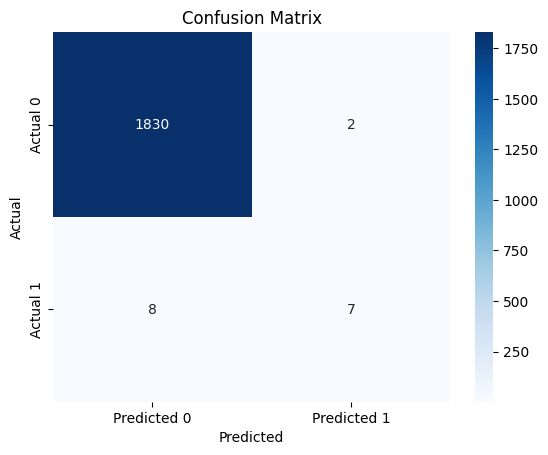

In [143]:
val_auc = roc_auc_score(y_val, val_proba)
val_pred = (val_proba >= best_thresh).astype(int)
val_f1   = f1_score(y_val, val_pred)

print(f"Validation AUROC: {val_auc:.4f}")
print(f"Validation F1 @{best_thresh:.3f}: {val_f1:.4f}")
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
plot_confusion_matrix(y_val, val_pred)


Test AUROC: 0.9934
Test F1  @0.990: 0.6000
Test Confusion Matrix:
 [[1833    0]
 [   8    6]]


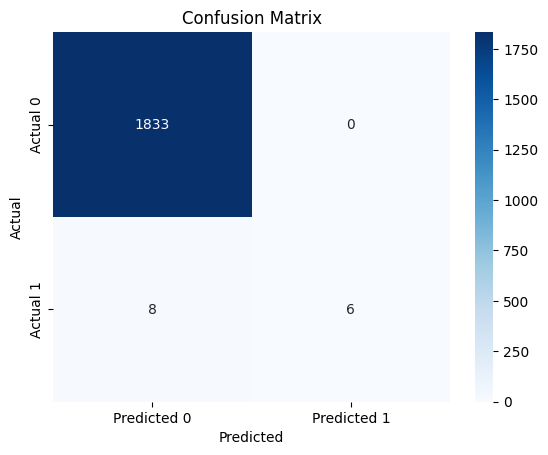

In [144]:
test_proba = logreg.predict_proba(X_test)[:, 1]
test_auc   = roc_auc_score(y_test, test_proba)
test_pred  = (test_proba >= best_thresh).astype(int)
test_f1    = f1_score(y_test, test_pred)

print(f"\nTest AUROC: {test_auc:.4f}")
print(f"Test F1  @{best_thresh:.3f}: {test_f1:.4f}")
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
plot_confusion_matrix(y_test, test_pred)

In [165]:
# <Student to fill this section>
model_performance_explanations = """
The model performs exceptionally (AUROC 0.9845 on validation / 0.9934 on test), but the selected operating point (threshold = 0.99) is very cautious. During validation, the outcomes are TN=1830, FP=2, FN=8, TP=7, while for testing, they are TN=1833, FP=0, FN=8, TP=6. This results in almost flawless specificity with almost no false positives, yet modest recall—approximately 47% (7/15) on validation and 43% (6/14) on test. As a result, the F1 score falls within the 0.58–0.60 range: precision is high (0.78 validation, 1.00 test) since very few positives are identified, yet around half of the actual drafted players are overlooked. Due to the limited number of positives, these counts are sensitive to variance; however, the trend is evident: the model distinguishes classes well, but the threshold prioritizes minimizing false alarms rather than increasing true positives. To enhance recall, decreasing the threshold or using methods like SMOTE-ENN or class-weight adjustments may boost true positive rates, albeit with a reduction in precision; if the goal is to minimize false positives and maximize AUROC, the existing configuration is suitable
"""

In [166]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance


In [173]:
# <Student to fill this section>
business_impacts_explanations = """
The experiment showed that the model attained remarkably high ranking performance, with AUROC scores of 0.9845 (validation) and 0.9934 (test). Employing a 0.99 decision threshold, it generated minimal false positives—just 2 in validation and none in the test set—but overlooked about half of the true positives. This validated that the model’s feature set and preprocessing procedure can effectively distinguish the classes, with the primary performance trade-off being in the selection of the threshold rather than in inherent model constraints.

A key insight from the experiment is that the model, in its present precision-oriented setup, performs exceptionally well at producing a brief, high-confidence selection of candidates. This makes it perfect for situations where reducing false positives is essential. Nevertheless, if the business goal changes to encompass a broader range of potential positives, meticulously modifying the decision threshold could greatly enhance recall while maintaining a large portion of the model’s impressive AUROC performance, thus achieving a balance between quality and coverage

Recommended next steps:

1. Hyperparameter tuning – Optimise parameters such as regularisation strength, class weights, and solver settings to enhance recall without major precision loss. High expected gain in recall and F1.

2. Feature enhancement – Introduce interaction terms and refine engineered metrics to capture additional patterns. Small to moderate uplift in AUROC/F1.

3. Alternative models – Test gradient boosting methods (e.g., XGBoost) to capture non-linear feature interactions. Potential uplift in both recall and AUROC.

4. Probability calibration – Improve probability estimates for more stable decision-making. Increases threshold robustness over time.

"""

In [174]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [169]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [171]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [170]:
# <Student to fill this section>
experiment_results_explanations = """
The experiments show a clear pattern: the model has strong ranking power (AUROC ≈ 0.99 on val/test), but the current operating point (threshold ≈ 0.99) trades recall for near-perfect specificity, yielding only moderate F1 and missing roughly half of true positives—misaligned with a discovery/coverage objective. This is not a dead end; the feature signal is there, and the bottleneck is decision policy and class handling, not model capacity. Therefore, further experimentation is justified. Highest-ROI next steps, with expected gains and priority, are: (1) threshold policy tuned to a recall target or top-K per cohort—fastest change, +15–30 pp recall at a modest precision cost (Rank #1); (2) adopt a top-K operational workflow to stabilise scouting effort and ensure coverage (Rank #2); (3) apply SMOTE-ENN on the training split only (k_neighbors=2) after scaling to clean boundaries and enrich minority density, +5–15 pp recall and up to +2–6 pp AUC (Rank #3); (4) cost-sensitive thresholding using explicit FP/FN utilities to align with business value (Rank #4); (5) sweep class weights for simpler recall gains (+5–10 pp) without oversampling (Rank #5); (6) advance to boosted trees with early stopping and scale_pos_weight for additional lift (+10–20 pp recall, +2–5 pp AUC) once policy is fixed (Rank #6); (7) calibrate probabilities (Platt/Isotonic) to make thresholds portable over time (Rank #7); (8) group/temporal CV and position-wise recall checks to ensure generalisation and avoid blind spots (Rank #8). If the business goal is a short, very high-precision shortlist, the current setup may already suffice; in that case, freeze the pipeline (split → scaler fit on train → model → chosen threshold/top-K), persist artifacts (scaler/model/config), serve predictions with identical preprocessing, and stand up monitoring for drift, calibration, and cohort-level precision/recall, with a feedback loop for periodic retraining and documented governance.
"""

In [150]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

# Kaggle Submission Code


In [151]:

test_df = pd.read_csv("../test.csv")

test_df["Scoring_Efficiency"] = np.where(
    (test_df["twoPM"].clip(lower=0) + test_df["FTA"].clip(lower=0)) > 0,
    test_df["pts"] / (test_df["twoPM"].clip(lower=0) + test_df["FTA"].clip(lower=0)),
    0.0
)

test_df["Aggressiveness_Count"] = (
    test_df["FTA"].clip(lower=0) +
    test_df["rimmade"].clip(lower=0) +
    test_df["dunksmade"].clip(lower=0)
)

test_df["Defensive_Impact"] = pd.concat(
    [
        test_df["stops"].astype(float),
        test_df["bpm"].astype(float),
        test_df["gbpm"].astype(float)
    ],
    axis=1
).mean(axis=1, skipna=True)


FINAL_FEATURES = [
    'Rec_Rank', 'porpag', 'dporpag', 'twoPM', 'pts', 'stops', 'FTA',
    'rimmade', 'dunksmade', 'adjoe', 'gbpm', 'bpm',
    'Scoring_Efficiency', 'Defensive_Impact', 'Aggressiveness_Count'
]
X_test = test_df[FINAL_FEATURES].fillna(0)


X_test_scaled = scaler.transform(X_test)


test_probs = logreg.predict_proba(X_test_scaled)[:, 1]


submission = pd.DataFrame({
    "player_id": test_df["player_id"],
    "drafted": test_probs
})

submission.to_csv("../submission_2.csv", index=False)
print("Submission file saved as submission.csv")
print(submission.head())


Submission file saved as submission.csv
                              player_id   drafted
0  c6d3ce49-28b6-4756-8061-b2bd68730c52  0.000019
1  24dd0ae2-9d22-4d31-9cb6-c31f58f903b5  0.000029
2  0cf3e822-9446-4285-b7ed-7c19d8e976fe  0.001011
3  b1a88de0-6852-4597-bb92-9164b40758e5  0.000028
4  97c327ce-d051-40f0-9166-1a43557c3c92  0.000025
